In [2]:
# import sys; sys.path.insert(1, "/app/")

In [1]:
from pathlib import Path
from utils.autocomplete.markup_yolo import pdf_to_img, make_train_test_dir, rm_tree
from utils.extraction.prioritet_extractor import PrioritetExtractor

from ultralytics import YOLO
import cv2
import torch

from utils.autocomplete.markup_yolo import get_true_path_to_pdf, get_dates_and_numbers, plot_count_dates_numbers
%matplotlib inline

/opt/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/venv/lib/python3.10/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'allow_population_by_field_name' has been renamed to 'populate_by_name'
  warnings.warn(message, UserWarning)


## Markup data and Train model for predict 8 classes (date, number, content, sender, recipient, text, signer, application )

#### МЭР

In [2]:
# path_to_pdf = Path('/data/docs/vh/incoming_2023_feb') # путь у файлам пдф
# path_to_jpeg = Path('/data/docs/vh/yolo/jpeg/') # путь для хранения jpeg преобразованных из пдф

# path_from_markup = Path('/data/docs/vh/yolo/markup_1000') # место хранения размеченных документов
# path_to_train_test = Path('/data/docs/vh/yolo') # место хранения train/test выборок

#### DigDes

In [7]:
path_to_pdf = Path('/data/docs/mer/vh_full/') # путь у файлам пдф
path_to_jpeg = Path('/local_data/yolov_markup/jpeg_3_pages/') # путь для хранения jpeg преобразованных из пдф

path_from_markup = Path('/local_data/yolov_markup/markup_8_classes/') # место хранения размеченных документов
path_to_train_test = Path('/local_data/yolov_markup/markup_8_classes/') # место хранения train/test выборок

In [8]:
extractor = PrioritetExtractor()

### Преобразование pdf в jpeg  
Преобразование пдф файлов в формат jpeg для дальнейшей разметки. В данном случае взято 1000 документов.

In [2]:
# rm_tree(path_to_jpeg)

In [6]:
pdf_to_img(path_to_pdf, path_to_jpeg, last_page=3)

[ WARN:0@158.411] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/d3e25978-7250-4f3d-9fae-5142d39280c9_0.jpg'): can't open file for writing: permission denied
[ WARN:0@158.428] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/d3e25978-7250-4f3d-9fae-5142d39280c9_1.jpg'): can't open file for writing: permission denied
[ WARN:0@158.439] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/d3e25978-7250-4f3d-9fae-5142d39280c9_2.jpg'): can't open file for writing: permission denied


[ WARN:0@158.712] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/f5805e2c-0ed3-40e4-a16e-5f2370d0412d_0.jpg'): can't open file for writing: permission denied


[ WARN:0@159.072] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/891c3996-5be4-49cf-a717-107b67536f42_0.jpg'): can't open file for writing: permission denied
[ WARN:0@159.090] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/891c3996-5be4-49cf-a717-107b67536f42_1.jpg'): can't open file for writing: permission denied
[ WARN:0@159.105] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/891c3996-5be4-49cf-a717-107b67536f42_2.jpg'): can't open file for writing: permission denied
[ WARN:0@159.222] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/6bab4407-7afd-45bb-9c19-95aeb4055930_0.jpg'): can't open file for writing: permission denied


[ WARN:0@159.509] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/b98b4f3d-08df-4bc2-85a4-90f1af724ad6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@159.516] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/b98b4f3d-08df-4bc2-85a4-90f1af724ad6_1.jpg'): can't open file for writing: permission denied
[ WARN:0@159.528] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/b98b4f3d-08df-4bc2-85a4-90f1af724ad6_2.jpg'): can't open file for writing: permission denied


[ WARN:0@159.757] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/aa2498d9-dc59-4b33-bdcf-aec25ada7f23_0.jpg'): can't open file for writing: permission denied
[ WARN:0@159.771] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/aa2498d9-dc59-4b33-bdcf-aec25ada7f23_1.jpg'): can't open file for writing: permission denied


[ WARN:0@159.979] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/ef76b51a-3f85-4eca-9cb5-20c45f9eb929_0.jpg'): can't open file for writing: permission denied
[ WARN:0@159.989] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/ef76b51a-3f85-4eca-9cb5-20c45f9eb929_1.jpg'): can't open file for writing: permission denied


[ WARN:0@160.200] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/24f62e09-44a5-4284-8ef5-8db6e0d55f0e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@160.210] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/24f62e09-44a5-4284-8ef5-8db6e0d55f0e_1.jpg'): can't open file for writing: permission denied


[ WARN:0@160.722] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/41f5dcc0-23a3-452b-b209-f947cb4c16a6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@160.731] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/41f5dcc0-23a3-452b-b209-f947cb4c16a6_1.jpg'): can't open file for writing: permission denied


[ WARN:0@161.050] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/da290030-1dac-4132-81cd-7575e2b08a22_0.jpg'): can't open file for writing: permission denied
[ WARN:0@161.058] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/da290030-1dac-4132-81cd-7575e2b08a22_1.jpg'): can't open file for writing: permission denied
[ WARN:0@161.069] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/da290030-1dac-4132-81cd-7575e2b08a22_2.jpg'): can't open file for writing: permission denied


[ WARN:0@161.347] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/9bc8ebaa-1376-4a89-a53c-ec934aa3f392_0.jpg'): can't open file for writing: permission denied
[ WARN:0@161.359] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/9bc8ebaa-1376-4a89-a53c-ec934aa3f392_1.jpg'): can't open file for writing: permission denied
[ WARN:0@161.370] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/9bc8ebaa-1376-4a89-a53c-ec934aa3f392_2.jpg'): can't open file for writing: permission denied
[ WARN:0@161.502] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/b0b104b2-be21-45f8-83d5-04b445ea41d6_0.jpg'): can't open file for writing: permission denied


[ WARN:0@161.799] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/c8b8a2df-6809-41bf-9168-e18a4cd6446e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@161.809] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/c8b8a2df-6809-41bf-9168-e18a4cd6446e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@161.820] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/c8b8a2df-6809-41bf-9168-e18a4cd6446e_2.jpg'): can't open file for writing: permission denied


[ WARN:0@162.094] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/34c306f3-4853-4398-a582-9d5088627904_0.jpg'): can't open file for writing: permission denied
[ WARN:0@162.213] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/e7d9bf8b-60e0-492f-a33c-f771fa6a2b3e_0.jpg'): can't open file for writing: permission denied


[ WARN:0@162.341] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/f9061aed-9192-4f96-b185-8fe14b978570_0.jpg'): can't open file for writing: permission denied
[ WARN:0@162.506] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/2129d7e1-6b01-431c-8631-925a39a34d7e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@162.518] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/2129d7e1-6b01-431c-8631-925a39a34d7e_1.jpg'): can't open file for writing: permission denied


[ WARN:0@162.839] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/c74af182-8fc8-4084-8321-8b6c3ecb23f4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@162.847] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/c74af182-8fc8-4084-8321-8b6c3ecb23f4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@162.860] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/c74af182-8fc8-4084-8321-8b6c3ecb23f4_2.jpg'): can't open file for writing: permission denied


[ WARN:0@163.173] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/68e2b604-c5c7-40a4-a346-084df00310e2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@163.188] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/68e2b604-c5c7-40a4-a346-084df00310e2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@163.200] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/68e2b604-c5c7-40a4-a346-084df00310e2_2.jpg'): can't open file for writing: permission denied


[ WARN:0@163.429] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/cb60ab21-9491-43ab-ba58-2cada4192790_0.jpg'): can't open file for writing: permission denied


[ WARN:0@163.726] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/662b6c70-f73b-4710-97fa-ca7628b1193b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@163.737] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/662b6c70-f73b-4710-97fa-ca7628b1193b_1.jpg'): can't open file for writing: permission denied
[ WARN:0@163.747] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/662b6c70-f73b-4710-97fa-ca7628b1193b_2.jpg'): can't open file for writing: permission denied


[ WARN:0@163.976] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/f59850ea-6554-4846-b8e1-03d703ecd0be_0.jpg'): can't open file for writing: permission denied
[ WARN:0@163.985] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/f59850ea-6554-4846-b8e1-03d703ecd0be_1.jpg'): can't open file for writing: permission denied


[ WARN:0@164.278] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/09cc8ade-e089-41ce-baad-cbb548cdd8cf_0.jpg'): can't open file for writing: permission denied
[ WARN:0@164.398] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/9f4b348f-861b-41a4-80b4-a0bccf20b8eb_0.jpg'): can't open file for writing: permission denied


[ WARN:0@164.687] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/2684ad27-3326-4a9c-a1e4-7559f69237f3_0.jpg'): can't open file for writing: permission denied


[ WARN:0@164.981] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/0_50/d93b5cb3-8f8b-4a39-b49e-4f5c63f14efa_0.jpg'): can't open file for writing: permission denied
[ WARN:0@164.990] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/d93b5cb3-8f8b-4a39-b49e-4f5c63f14efa_1.jpg'): can't open file for writing: permission denied
[ WARN:0@165.001] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/d93b5cb3-8f8b-4a39-b49e-4f5c63f14efa_2.jpg'): can't open file for writing: permission denied
[ WARN:0@165.133] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/408f9021-1532-434c-abfa-481345b8983f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@165.376] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/d5167288-129a-402d-b91f-7baf6249e151_0.jpg'): can't open file for writing: permission denied
[ WARN:0@165.391] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/d5167288-129a-402d-b91f-7baf6249e151_1.jpg'): can't open file for writing: permission denied


[ WARN:0@165.684] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/352b310e-9c1c-4edc-892c-ad8aaa23f86f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@165.692] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/352b310e-9c1c-4edc-892c-ad8aaa23f86f_1.jpg'): can't open file for writing: permission denied
[ WARN:0@165.702] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/352b310e-9c1c-4edc-892c-ad8aaa23f86f_2.jpg'): can't open file for writing: permission denied


[ WARN:0@165.964] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/edad340b-e61d-4706-80da-c18191d5b1d5_0.jpg'): can't open file for writing: permission denied


[ WARN:0@166.709] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/5319b0f2-ee1c-423f-b087-5579a924df14_0.jpg'): can't open file for writing: permission denied
[ WARN:0@166.724] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/5319b0f2-ee1c-423f-b087-5579a924df14_1.jpg'): can't open file for writing: permission denied
[ WARN:0@166.734] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/5319b0f2-ee1c-423f-b087-5579a924df14_2.jpg'): can't open file for writing: permission denied
[ WARN:0@166.824] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/35c77374-69df-4c2c-b5e5-ea2f858781b7_0.jpg'): can't open file for writing: permission denied


[ WARN:0@166.945] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/3fd62713-88da-4d24-b38b-9d0970e4291c_0.jpg'): can't open file for writing: permission denied


[ WARN:0@167.223] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/276da42d-d092-4d09-b58d-7772f8b77dcc_0.jpg'): can't open file for writing: permission denied
[ WARN:0@167.230] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/276da42d-d092-4d09-b58d-7772f8b77dcc_1.jpg'): can't open file for writing: permission denied
[ WARN:0@167.241] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/276da42d-d092-4d09-b58d-7772f8b77dcc_2.jpg'): can't open file for writing: permission denied
[ WARN:0@167.326] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/0f4a62fe-72ee-4bc7-8d74-8f6dc437cceb_0.jpg'): can't open file for writing: permission denied


[ WARN:0@167.438] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/09e32115-d3f6-4e77-8e80-1975336dd51e_0.jpg'): can't open file for writing: permission denied


[ WARN:0@167.681] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/a5ed9a0c-5b3f-46d1-88a3-05be98d1edf7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@167.694] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/a5ed9a0c-5b3f-46d1-88a3-05be98d1edf7_1.jpg'): can't open file for writing: permission denied
[ WARN:0@167.827] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/c9302b9a-5bce-4ef9-8852-6df2bc9f49ef_0.jpg'): can't open file for writing: permission denied


[ WARN:0@167.951] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/b7aee911-373d-441e-9a0b-63441ed89d83_0.jpg'): can't open file for writing: permission denied


[ WARN:0@168.284] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/fbc44370-1a14-42db-87e6-5d733b3583e7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@168.295] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/fbc44370-1a14-42db-87e6-5d733b3583e7_1.jpg'): can't open file for writing: permission denied
[ WARN:0@168.307] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/fbc44370-1a14-42db-87e6-5d733b3583e7_2.jpg'): can't open file for writing: permission denied


[ WARN:0@169.054] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/422065bf-3959-45a8-a7bf-2c636fbc7300_0.jpg'): can't open file for writing: permission denied
[ WARN:0@169.068] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/422065bf-3959-45a8-a7bf-2c636fbc7300_1.jpg'): can't open file for writing: permission denied
[ WARN:0@169.081] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/422065bf-3959-45a8-a7bf-2c636fbc7300_2.jpg'): can't open file for writing: permission denied


[ WARN:0@169.325] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/c9acd8ed-3b4a-4cd2-a08b-9f2609423015_0.jpg'): can't open file for writing: permission denied
[ WARN:0@169.338] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/c9acd8ed-3b4a-4cd2-a08b-9f2609423015_1.jpg'): can't open file for writing: permission denied
[ WARN:0@169.452] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/83c3ce76-6c9a-421b-8987-bec08543d653_0.jpg'): can't open file for writing: permission denied


[ WARN:0@169.687] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/48602dbd-73ee-4324-ae33-3fc2986ddea6_0.jpg'): can't open file for writing: permission denied


[ WARN:0@170.014] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/a36b194e-1039-4d34-98ec-f0203fb01c42_0.jpg'): can't open file for writing: permission denied
[ WARN:0@170.028] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/a36b194e-1039-4d34-98ec-f0203fb01c42_1.jpg'): can't open file for writing: permission denied
[ WARN:0@170.041] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/a36b194e-1039-4d34-98ec-f0203fb01c42_2.jpg'): can't open file for writing: permission denied


[ WARN:0@170.266] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/4b070182-5766-4167-be02-7d2b3e919926_0.jpg'): can't open file for writing: permission denied
[ WARN:0@170.281] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/4b070182-5766-4167-be02-7d2b3e919926_1.jpg'): can't open file for writing: permission denied


[ WARN:0@170.504] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/4546e199-2134-4de8-87da-2ca4f26b9304_0.jpg'): can't open file for writing: permission denied
[ WARN:0@170.514] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/4546e199-2134-4de8-87da-2ca4f26b9304_1.jpg'): can't open file for writing: permission denied


[ WARN:0@170.836] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/2740a6ff-c909-40af-af00-7d73c7a1d079_0.jpg'): can't open file for writing: permission denied
[ WARN:0@170.847] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/2740a6ff-c909-40af-af00-7d73c7a1d079_1.jpg'): can't open file for writing: permission denied
[ WARN:0@170.859] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/2740a6ff-c909-40af-af00-7d73c7a1d079_2.jpg'): can't open file for writing: permission denied


[ WARN:0@171.152] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/db6104f3-b555-472e-9823-c4b2d0b24dd7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@171.168] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/db6104f3-b555-472e-9823-c4b2d0b24dd7_1.jpg'): can't open file for writing: permission denied
[ WARN:0@171.177] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/db6104f3-b555-472e-9823-c4b2d0b24dd7_2.jpg'): can't open file for writing: permission denied


[ WARN:0@171.468] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/73ccb908-6ad4-4ccb-bbaf-56d1e3508d5b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@171.481] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/73ccb908-6ad4-4ccb-bbaf-56d1e3508d5b_1.jpg'): can't open file for writing: permission denied
[ WARN:0@171.491] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/73ccb908-6ad4-4ccb-bbaf-56d1e3508d5b_2.jpg'): can't open file for writing: permission denied


[ WARN:0@171.710] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/50_100/1ed4fdac-8cdb-49b8-94c9-2ae5d747176f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@171.724] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/1ed4fdac-8cdb-49b8-94c9-2ae5d747176f_1.jpg'): can't open file for writing: permission denied


[ WARN:0@172.046] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/13bfc06b-73ef-41cf-82ae-fc21d9ad7a82_0.jpg'): can't open file for writing: permission denied
[ WARN:0@172.061] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/13bfc06b-73ef-41cf-82ae-fc21d9ad7a82_1.jpg'): can't open file for writing: permission denied
[ WARN:0@172.073] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/13bfc06b-73ef-41cf-82ae-fc21d9ad7a82_2.jpg'): can't open file for writing: permission denied


[ WARN:0@172.386] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/3e9d9b4f-f38e-427e-bda6-57ac3188903c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@172.399] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/3e9d9b4f-f38e-427e-bda6-57ac3188903c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@172.412] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/3e9d9b4f-f38e-427e-bda6-57ac3188903c_2.jpg'): can't open file for writing: permission denied
[ WARN:0@172.531] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/adae2ab9-980b-4e99-999f-400d14816885_0.jpg'): can't open file for writing: permission denied
[ WARN:0@172.549] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/adae2ab9-980b-4e99-999f-400d14816885_1.jpg'): can't open file for writing: permission denied


[ WARN:0@172.856] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/1f4faf31-5074-4a2e-8c58-069c6fdb6c8e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@172.867] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/1f4faf31-5074-4a2e-8c58-069c6fdb6c8e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@172.877] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/1f4faf31-5074-4a2e-8c58-069c6fdb6c8e_2.jpg'): can't open file for writing: permission denied


[ WARN:0@173.344] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/dbe69c34-bad9-4da3-b5eb-abe57005e098_0.jpg'): can't open file for writing: permission denied
[ WARN:0@173.358] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/dbe69c34-bad9-4da3-b5eb-abe57005e098_1.jpg'): can't open file for writing: permission denied
[ WARN:0@173.466] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/7a434827-13b9-4816-80a5-c8dcbbad3282_0.jpg'): can't open file for writing: permission denied
[ WARN:0@173.477] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/7a434827-13b9-4816-80a5-c8dcbbad3282_1.jpg'): can't open file for writing: permission denied
[ WARN:0@173.490] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/7a434827-13b9-4816-80a5-c8dcbbad3282_2.jpg'): can't open file for writing: permission denied


[ WARN:0@174.098] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5f03fd0a-03e1-4d88-aacf-7fe3310c118d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@174.111] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5f03fd0a-03e1-4d88-aacf-7fe3310c118d_1.jpg'): can't open file for writing: permission denied
[ WARN:0@174.121] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5f03fd0a-03e1-4d88-aacf-7fe3310c118d_2.jpg'): can't open file for writing: permission denied


[ WARN:0@174.613] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/aae8ef7e-3836-4abc-947c-a56fc8101b8a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@174.624] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/aae8ef7e-3836-4abc-947c-a56fc8101b8a_1.jpg'): can't open file for writing: permission denied


[ WARN:0@174.840] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/854c3615-3d61-4e9a-8bca-f9608d82b720_0.jpg'): can't open file for writing: permission denied
[ WARN:0@174.852] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/854c3615-3d61-4e9a-8bca-f9608d82b720_1.jpg'): can't open file for writing: permission denied


[ WARN:0@175.186] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/793a5d86-add7-4353-a8a5-62f5dfbde7e8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@175.199] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/793a5d86-add7-4353-a8a5-62f5dfbde7e8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@175.213] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/793a5d86-add7-4353-a8a5-62f5dfbde7e8_2.jpg'): can't open file for writing: permission denied


[ WARN:0@175.442] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/cf8d2d34-2109-4acc-b158-89f9a410497c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@175.459] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/cf8d2d34-2109-4acc-b158-89f9a410497c_1.jpg'): can't open file for writing: permission denied


[ WARN:0@175.667] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/dd96f6fd-e91a-42fe-8860-5ca05c08dd42_0.jpg'): can't open file for writing: permission denied
[ WARN:0@175.677] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/dd96f6fd-e91a-42fe-8860-5ca05c08dd42_1.jpg'): can't open file for writing: permission denied


[ WARN:0@175.942] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5ffd00f8-4c1b-457e-ace6-a761f3d569c9_0.jpg'): can't open file for writing: permission denied
[ WARN:0@175.956] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5ffd00f8-4c1b-457e-ace6-a761f3d569c9_1.jpg'): can't open file for writing: permission denied
[ WARN:0@175.966] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5ffd00f8-4c1b-457e-ace6-a761f3d569c9_2.jpg'): can't open file for writing: permission denied


[ WARN:0@176.447] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/c77c7d6e-5d9b-4e3e-9223-d160dfd31307_0.jpg'): can't open file for writing: permission denied
[ WARN:0@176.458] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/c77c7d6e-5d9b-4e3e-9223-d160dfd31307_1.jpg'): can't open file for writing: permission denied


[ WARN:0@176.747] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/9cf9b378-2017-41f0-9fda-ea9a86512229_0.jpg'): can't open file for writing: permission denied
[ WARN:0@176.757] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/9cf9b378-2017-41f0-9fda-ea9a86512229_1.jpg'): can't open file for writing: permission denied
[ WARN:0@176.767] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/9cf9b378-2017-41f0-9fda-ea9a86512229_2.jpg'): can't open file for writing: permission denied


[ WARN:0@177.091] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5141a9a2-c1a2-41cf-88ec-5e8d37beaebe_0.jpg'): can't open file for writing: permission denied
[ WARN:0@177.103] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5141a9a2-c1a2-41cf-88ec-5e8d37beaebe_1.jpg'): can't open file for writing: permission denied
[ WARN:0@177.117] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/5141a9a2-c1a2-41cf-88ec-5e8d37beaebe_2.jpg'): can't open file for writing: permission denied


[ WARN:0@177.334] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/1a729ee1-c1f1-4d12-b8f8-2101771a263a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@177.348] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/1a729ee1-c1f1-4d12-b8f8-2101771a263a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@177.470] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/6825ab86-c79b-40fc-bcb9-df67edb96679_0.jpg'): can't open file for writing: permission denied


[ WARN:0@177.915] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/43b77c4b-b890-4bec-aff7-20c0419a41e4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@177.928] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/43b77c4b-b890-4bec-aff7-20c0419a41e4_1.jpg'): can't open file for writing: permission denied


[ WARN:0@178.129] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/91076812-c365-4b2d-886f-28a23fd515ac_0.jpg'): can't open file for writing: permission denied
[ WARN:0@178.144] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/91076812-c365-4b2d-886f-28a23fd515ac_1.jpg'): can't open file for writing: permission denied


[ WARN:0@178.796] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/100_150/e4f50aeb-a41f-4b2c-90f3-768e73ad7dab_0.jpg'): can't open file for writing: permission denied
[ WARN:0@178.806] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/e4f50aeb-a41f-4b2c-90f3-768e73ad7dab_1.jpg'): can't open file for writing: permission denied
[ WARN:0@178.816] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/e4f50aeb-a41f-4b2c-90f3-768e73ad7dab_2.jpg'): can't open file for writing: permission denied
[ WARN:0@178.870] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/dbb212b7-b807-4383-9a1c-ff7bd9bc3ad2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@178.995] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/6142acb0-698d-4209-9b85-eb88d3f34e81_0.jpg'): can't open file for writing: permission denied


[ WARN:0@179.275] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/e9417371-f663-48f5-96a7-e67b9661493b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@179.398] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/38cd3672-13b5-4b4b-b268-9176bcea6da5_0.jpg'): can't open file for writing: permission denied


[ WARN:0@179.692] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/9ec6194d-fc4b-4a40-957a-6b322aa9203c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@179.703] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/9ec6194d-fc4b-4a40-957a-6b322aa9203c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@179.713] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/9ec6194d-fc4b-4a40-957a-6b322aa9203c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@180.066] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/daee7960-939b-4025-bac3-3c5e9a60bdd2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@180.082] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/daee7960-939b-4025-bac3-3c5e9a60bdd2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@180.096] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/daee7960-939b-4025-bac3-3c5e9a60bdd2_2.jpg'): can't open file for writing: permission denied


[ WARN:0@180.312] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/33f2f6ad-7593-461e-96c7-bf89c5b789df_0.jpg'): can't open file for writing: permission denied
[ WARN:0@180.327] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/33f2f6ad-7593-461e-96c7-bf89c5b789df_1.jpg'): can't open file for writing: permission denied
[ WARN:0@180.448] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/299f8aca-df47-435c-ba58-1d4e39f54e2f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@180.755] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/04db8c23-2eb8-43d3-9977-82f830ab43e6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@180.768] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/04db8c23-2eb8-43d3-9977-82f830ab43e6_1.jpg'): can't open file for writing: permission denied
[ WARN:0@180.778] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/04db8c23-2eb8-43d3-9977-82f830ab43e6_2.jpg'): can't open file for writing: permission denied
[ WARN:0@180.835] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/59da030e-eaed-4f00-bb62-8354b8fe1a9d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@180.946] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/7b62451a-a524-4596-9144-689a12a460b4_0.jpg'): can't open file for writing: permission denied


[ WARN:0@181.061] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/fffd6a4b-dd69-43c3-b21a-5e5b038527d3_0.jpg'): can't open file for writing: permission denied


[ WARN:0@181.270] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/d0319a83-a271-4f11-8799-3dad2d2973f4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@181.280] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/d0319a83-a271-4f11-8799-3dad2d2973f4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@181.399] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/b8fabb36-e690-4db3-b2f6-e0799d6b0515_0.jpg'): can't open file for writing: permission denied


[ WARN:0@181.604] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/b9fda802-1d3f-4a5f-8f8a-682393e8fa9b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@181.615] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/b9fda802-1d3f-4a5f-8f8a-682393e8fa9b_1.jpg'): can't open file for writing: permission denied


[ WARN:0@181.822] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/94a7cb6d-4375-4338-9fe8-9c7ad284e397_0.jpg'): can't open file for writing: permission denied
[ WARN:0@181.835] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/94a7cb6d-4375-4338-9fe8-9c7ad284e397_1.jpg'): can't open file for writing: permission denied


[ WARN:0@182.127] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/8c32b934-fde2-4144-8d5b-387ff0abd22a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@182.138] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/8c32b934-fde2-4144-8d5b-387ff0abd22a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@182.146] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/8c32b934-fde2-4144-8d5b-387ff0abd22a_2.jpg'): can't open file for writing: permission denied
[ WARN:0@182.270] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/0ad1434b-4975-44d4-96d9-32aff0fe6d15_0.jpg'): can't open file for writing: permission denied


[ WARN:0@182.765] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/daf52fd9-22fa-4412-b329-2ab598d7efee_0.jpg'): can't open file for writing: permission denied
[ WARN:0@182.776] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/daf52fd9-22fa-4412-b329-2ab598d7efee_1.jpg'): can't open file for writing: permission denied


[ WARN:0@183.529] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/16dd5f3d-a504-4ed3-8ab8-b62a88af5c9b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@183.539] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/16dd5f3d-a504-4ed3-8ab8-b62a88af5c9b_1.jpg'): can't open file for writing: permission denied
[ WARN:0@183.550] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/16dd5f3d-a504-4ed3-8ab8-b62a88af5c9b_2.jpg'): can't open file for writing: permission denied


[ WARN:0@183.830] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/4b6f9de6-94d4-41b9-83c4-c891c298be5c_0.jpg'): can't open file for writing: permission denied


[ WARN:0@184.045] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/616426ac-9032-4392-8355-838ef0e5ca85_0.jpg'): can't open file for writing: permission denied
[ WARN:0@184.057] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/616426ac-9032-4392-8355-838ef0e5ca85_1.jpg'): can't open file for writing: permission denied
[ WARN:0@184.173] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/99a4d0a4-4077-4040-be19-b08edaaa1a80_0.jpg'): can't open file for writing: permission denied


[ WARN:0@184.435] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/60a7b2c1-e1ca-4191-b87c-cc034924d86e_0.jpg'): can't open file for writing: permission denied


[ WARN:0@184.649] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/949bc15a-8570-421c-956a-289f6bb7847f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@184.660] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/949bc15a-8570-421c-956a-289f6bb7847f_1.jpg'): can't open file for writing: permission denied


[ WARN:0@185.158] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/42aaa295-581b-482f-a92a-f8b66e7ae70b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@185.168] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/42aaa295-581b-482f-a92a-f8b66e7ae70b_1.jpg'): can't open file for writing: permission denied


[ WARN:0@185.534] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/63c422be-5f77-48b1-96fb-3ace95f45b21_0.jpg'): can't open file for writing: permission denied
[ WARN:0@185.545] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/63c422be-5f77-48b1-96fb-3ace95f45b21_1.jpg'): can't open file for writing: permission denied
[ WARN:0@185.556] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/63c422be-5f77-48b1-96fb-3ace95f45b21_2.jpg'): can't open file for writing: permission denied


[ WARN:0@186.376] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/150_200/55898436-caf7-4e4e-9f30-3b698b5acb20_0.jpg'): can't open file for writing: permission denied
[ WARN:0@186.390] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/55898436-caf7-4e4e-9f30-3b698b5acb20_1.jpg'): can't open file for writing: permission denied
[ WARN:0@186.404] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/55898436-caf7-4e4e-9f30-3b698b5acb20_2.jpg'): can't open file for writing: permission denied


[ WARN:0@186.717] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/9c463df8-42f2-4830-bccd-762275dbbd27_0.jpg'): can't open file for writing: permission denied
[ WARN:0@186.731] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/9c463df8-42f2-4830-bccd-762275dbbd27_1.jpg'): can't open file for writing: permission denied
[ WARN:0@186.743] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/9c463df8-42f2-4830-bccd-762275dbbd27_2.jpg'): can't open file for writing: permission denied


[ WARN:0@187.074] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/915d0051-db66-4b87-8e46-a20a87bd0ba2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@187.088] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/915d0051-db66-4b87-8e46-a20a87bd0ba2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@187.103] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/915d0051-db66-4b87-8e46-a20a87bd0ba2_2.jpg'): can't open file for writing: permission denied


[ WARN:0@187.447] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f368f4c2-5b1e-4c5c-896f-6f83521e4bc7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@187.462] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f368f4c2-5b1e-4c5c-896f-6f83521e4bc7_1.jpg'): can't open file for writing: permission denied
[ WARN:0@187.477] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f368f4c2-5b1e-4c5c-896f-6f83521e4bc7_2.jpg'): can't open file for writing: permission denied
[ WARN:0@187.597] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/6096ae0f-91bb-4eaa-8836-d90cffb740ed_0.jpg'): can't open file for writing: permission denied


[ WARN:0@188.353] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/2787e46d-3ddf-4420-8832-e9b4a62c0b34_0.jpg'): can't open file for writing: permission denied
[ WARN:0@188.364] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/2787e46d-3ddf-4420-8832-e9b4a62c0b34_1.jpg'): can't open file for writing: permission denied
[ WARN:0@188.375] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/2787e46d-3ddf-4420-8832-e9b4a62c0b34_2.jpg'): can't open file for writing: permission denied


[ WARN:0@188.679] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/0c730fe8-7b92-439d-b70f-f1e7f6d1480a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@188.694] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/0c730fe8-7b92-439d-b70f-f1e7f6d1480a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@188.704] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/0c730fe8-7b92-439d-b70f-f1e7f6d1480a_2.jpg'): can't open file for writing: permission denied
[ WARN:0@188.823] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/7132a221-47bc-4e7e-9dc9-80a85c997bcd_0.jpg'): can't open file for writing: permission denied


[ WARN:0@189.161] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/6b7a9a37-4011-4671-be67-bb67a6b35d0a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@189.188] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/6b7a9a37-4011-4671-be67-bb67a6b35d0a_1.jpg'): can't open file for writing: permission denied


[ WARN:0@189.404] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/e7124d6b-1a2a-4fe6-baea-0fb2d5ea9b92_0.jpg'): can't open file for writing: permission denied
[ WARN:0@189.419] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/e7124d6b-1a2a-4fe6-baea-0fb2d5ea9b92_1.jpg'): can't open file for writing: permission denied


[ WARN:0@189.625] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f8be2070-d4e4-491a-bafb-a702a6dd77e5_0.jpg'): can't open file for writing: permission denied
[ WARN:0@189.634] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f8be2070-d4e4-491a-bafb-a702a6dd77e5_1.jpg'): can't open file for writing: permission denied


[ WARN:0@190.297] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/739e0d09-77cf-4b0e-8717-03e8bcc952b8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@190.306] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/739e0d09-77cf-4b0e-8717-03e8bcc952b8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@190.316] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/739e0d09-77cf-4b0e-8717-03e8bcc952b8_2.jpg'): can't open file for writing: permission denied


[ WARN:0@190.610] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/fc48e860-aa0b-4dda-ba3b-45ca40d5c1ff_0.jpg'): can't open file for writing: permission denied
[ WARN:0@190.626] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/fc48e860-aa0b-4dda-ba3b-45ca40d5c1ff_1.jpg'): can't open file for writing: permission denied
[ WARN:0@190.636] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/fc48e860-aa0b-4dda-ba3b-45ca40d5c1ff_2.jpg'): can't open file for writing: permission denied
[ WARN:0@190.742] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/8ee01d1f-29a4-4842-815c-4b5ff5add83f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@191.175] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/a33a140c-0188-44a6-a887-fde8a5593459_0.jpg'): can't open file for writing: permission denied
[ WARN:0@191.186] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/a33a140c-0188-44a6-a887-fde8a5593459_1.jpg'): can't open file for writing: permission denied
[ WARN:0@191.306] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/1ea9bd6d-0294-497c-9e00-2eb6edde4f7f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@191.597] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/e43a2eb6-bc70-4818-bc9f-8ed3101814a3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@191.604] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/e43a2eb6-bc70-4818-bc9f-8ed3101814a3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@191.616] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/e43a2eb6-bc70-4818-bc9f-8ed3101814a3_2.jpg'): can't open file for writing: permission denied
[ WARN:0@191.745] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/ac6965ce-3fc7-4871-9798-7d9f4512d8c1_0.jpg'): can't open file for writing: permission denied


[ WARN:0@192.061] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/016b147d-df0a-4d3b-b355-3b8e42e695b3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@192.071] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/016b147d-df0a-4d3b-b355-3b8e42e695b3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@192.081] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/016b147d-df0a-4d3b-b355-3b8e42e695b3_2.jpg'): can't open file for writing: permission denied


[ WARN:0@192.773] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/12789a50-eceb-4f10-afb7-45a491c83859_0.jpg'): can't open file for writing: permission denied
[ WARN:0@192.783] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/12789a50-eceb-4f10-afb7-45a491c83859_1.jpg'): can't open file for writing: permission denied
[ WARN:0@192.792] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/12789a50-eceb-4f10-afb7-45a491c83859_2.jpg'): can't open file for writing: permission denied


[ WARN:0@193.271] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/a7ee92e8-0914-47cb-a459-8ab5eb86c57b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@193.283] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/a7ee92e8-0914-47cb-a459-8ab5eb86c57b_1.jpg'): can't open file for writing: permission denied
[ WARN:0@193.358] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f05e2b3d-cc54-4be1-a8e3-344a8d80dde3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@193.368] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f05e2b3d-cc54-4be1-a8e3-344a8d80dde3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@193.378] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/200_250/f05e2b3d-cc54-4be1-a8e3-344a8d80dde3_2.jpg'): can't open file for writing: permission denied


[ WARN:0@193.594] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/1b12c8a6-f47b-4a09-ad23-e5fee3ce182e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@193.603] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/1b12c8a6-f47b-4a09-ad23-e5fee3ce182e_1.jpg'): can't open file for writing: permission denied


[ WARN:0@194.320] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/39cbce5c-6a78-4c52-bf9b-deb58b5471e2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@194.331] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/39cbce5c-6a78-4c52-bf9b-deb58b5471e2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@194.343] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/39cbce5c-6a78-4c52-bf9b-deb58b5471e2_2.jpg'): can't open file for writing: permission denied
[ WARN:0@194.464] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/efdb0e53-901b-4a98-97ce-a31a205e7482_0.jpg'): can't open file for writing: permission denied


[ WARN:0@194.743] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/ec283657-ed46-44d6-a3a2-b6e58af0228f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@194.754] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/ec283657-ed46-44d6-a3a2-b6e58af0228f_1.jpg'): can't open file for writing: permission denied
[ WARN:0@194.765] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/ec283657-ed46-44d6-a3a2-b6e58af0228f_2.jpg'): can't open file for writing: permission denied


[ WARN:0@195.111] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/ad00842f-be0b-416a-9612-96c4818b0572_0.jpg'): can't open file for writing: permission denied
[ WARN:0@195.128] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/ad00842f-be0b-416a-9612-96c4818b0572_1.jpg'): can't open file for writing: permission denied
[ WARN:0@195.141] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/ad00842f-be0b-416a-9612-96c4818b0572_2.jpg'): can't open file for writing: permission denied


[ WARN:0@195.444] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/22e982b8-48bf-4151-b955-2848954f6cd2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@195.454] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/22e982b8-48bf-4151-b955-2848954f6cd2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@195.467] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/22e982b8-48bf-4151-b955-2848954f6cd2_2.jpg'): can't open file for writing: permission denied


[ WARN:0@195.923] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/c1dc8fe9-2ff3-4a51-a7a9-21a56c7f1b69_0.jpg'): can't open file for writing: permission denied
[ WARN:0@195.934] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/c1dc8fe9-2ff3-4a51-a7a9-21a56c7f1b69_1.jpg'): can't open file for writing: permission denied


[ WARN:0@196.150] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/5fb37df3-ce2b-4edc-8ee3-a726e88d7974_0.jpg'): can't open file for writing: permission denied
[ WARN:0@196.165] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/5fb37df3-ce2b-4edc-8ee3-a726e88d7974_1.jpg'): can't open file for writing: permission denied


[ WARN:0@196.474] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/cef5679e-110b-4c13-aa1e-6c4ec872f570_0.jpg'): can't open file for writing: permission denied
[ WARN:0@196.482] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/cef5679e-110b-4c13-aa1e-6c4ec872f570_1.jpg'): can't open file for writing: permission denied
[ WARN:0@196.495] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/cef5679e-110b-4c13-aa1e-6c4ec872f570_2.jpg'): can't open file for writing: permission denied


[ WARN:0@196.810] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/44fe7a2b-32c6-47df-b42f-d2fe943c4776_0.jpg'): can't open file for writing: permission denied
[ WARN:0@196.820] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/44fe7a2b-32c6-47df-b42f-d2fe943c4776_1.jpg'): can't open file for writing: permission denied
[ WARN:0@196.830] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/44fe7a2b-32c6-47df-b42f-d2fe943c4776_2.jpg'): can't open file for writing: permission denied


[ WARN:0@197.130] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/62dca724-d9c7-4ebe-a4ed-e9f2f73577e4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@197.139] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/62dca724-d9c7-4ebe-a4ed-e9f2f73577e4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@197.149] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/62dca724-d9c7-4ebe-a4ed-e9f2f73577e4_2.jpg'): can't open file for writing: permission denied


[ WARN:0@197.478] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/8d1c26e2-f708-4bbb-b464-758382aad796_0.jpg'): can't open file for writing: permission denied
[ WARN:0@197.488] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/8d1c26e2-f708-4bbb-b464-758382aad796_1.jpg'): can't open file for writing: permission denied
[ WARN:0@197.498] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/8d1c26e2-f708-4bbb-b464-758382aad796_2.jpg'): can't open file for writing: permission denied


[ WARN:0@197.719] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/9464a3d3-4426-4e0e-8d9d-02b6e29869df_0.jpg'): can't open file for writing: permission denied
[ WARN:0@197.734] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/9464a3d3-4426-4e0e-8d9d-02b6e29869df_1.jpg'): can't open file for writing: permission denied


[ WARN:0@198.440] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/77f12db1-1c59-4adc-bcc2-4d04d8554d29_0.jpg'): can't open file for writing: permission denied
[ WARN:0@198.452] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/77f12db1-1c59-4adc-bcc2-4d04d8554d29_1.jpg'): can't open file for writing: permission denied
[ WARN:0@198.465] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/77f12db1-1c59-4adc-bcc2-4d04d8554d29_2.jpg'): can't open file for writing: permission denied


[ WARN:0@198.704] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/4236c2cc-0d17-4001-9321-ce65228b3bb5_0.jpg'): can't open file for writing: permission denied
[ WARN:0@198.715] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/4236c2cc-0d17-4001-9321-ce65228b3bb5_1.jpg'): can't open file for writing: permission denied
[ WARN:0@198.770] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/dfa5f2d5-c3a6-4d2d-8626-e27839f179ba_0.jpg'): can't open file for writing: permission denied


[ WARN:0@199.024] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/80c15e33-5beb-4e7f-8620-a73faae021d8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@199.149] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/001b25c9-eee1-4b49-b7d5-8c8388596eb0_0.jpg'): can't open file for writing: permission denied


[ WARN:0@199.287] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/73867568-f908-4895-9a8a-2d79b31d389d_0.jpg'): can't open file for writing: permission denied


[ WARN:0@199.596] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/a3fe1421-9f15-4278-b2bf-e9148b3df782_0.jpg'): can't open file for writing: permission denied
[ WARN:0@199.605] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/a3fe1421-9f15-4278-b2bf-e9148b3df782_1.jpg'): can't open file for writing: permission denied
[ WARN:0@199.616] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/a3fe1421-9f15-4278-b2bf-e9148b3df782_2.jpg'): can't open file for writing: permission denied


[ WARN:0@199.896] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/f82fec45-9003-49c7-98f5-cfd741295b77_0.jpg'): can't open file for writing: permission denied
[ WARN:0@199.910] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/f82fec45-9003-49c7-98f5-cfd741295b77_1.jpg'): can't open file for writing: permission denied
[ WARN:0@199.920] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/f82fec45-9003-49c7-98f5-cfd741295b77_2.jpg'): can't open file for writing: permission denied
[ WARN:0@200.044] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/b967d3dd-990c-455c-b96c-02603855d775_0.jpg'): can't open file for writing: permission denied


[ WARN:0@200.155] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/250_300/4df6589f-ad38-4abe-9b3a-e06ec48f2ebd_0.jpg'): can't open file for writing: permission denied


[ WARN:0@200.495] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/25857c55-4cf5-462c-ae6c-556172fa0814_0.jpg'): can't open file for writing: permission denied
[ WARN:0@200.507] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/25857c55-4cf5-462c-ae6c-556172fa0814_1.jpg'): can't open file for writing: permission denied
[ WARN:0@200.522] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/25857c55-4cf5-462c-ae6c-556172fa0814_2.jpg'): can't open file for writing: permission denied


[ WARN:0@200.826] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/0562eda1-929c-4865-938b-63a043718900_0.jpg'): can't open file for writing: permission denied
[ WARN:0@200.838] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/0562eda1-929c-4865-938b-63a043718900_1.jpg'): can't open file for writing: permission denied
[ WARN:0@200.850] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/0562eda1-929c-4865-938b-63a043718900_2.jpg'): can't open file for writing: permission denied
[ WARN:0@200.983] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/2c3933d7-7f98-4577-9fab-1848b046a2cc_0.jpg'): can't open file for writing: permission denied


[ WARN:0@201.249] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/320bf782-f7e3-452e-8588-bc3afc6e6625_0.jpg'): can't open file for writing: permission denied


[ WARN:0@201.603] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/a8e9f265-2932-4480-94c4-4eb775339a4c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@201.617] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/a8e9f265-2932-4480-94c4-4eb775339a4c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@201.630] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/a8e9f265-2932-4480-94c4-4eb775339a4c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@202.409] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/fbd01dea-62c5-4347-9d83-19945b5dfd59_0.jpg'): can't open file for writing: permission denied
[ WARN:0@202.422] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/fbd01dea-62c5-4347-9d83-19945b5dfd59_1.jpg'): can't open file for writing: permission denied
[ WARN:0@202.436] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/fbd01dea-62c5-4347-9d83-19945b5dfd59_2.jpg'): can't open file for writing: permission denied
[ WARN:0@202.562] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/6b3d5345-ae4f-421d-be6e-1bd4a0133b63_0.jpg'): can't open file for writing: permission denied


[ WARN:0@202.641] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/8b9fa7cb-1cf5-4f36-94eb-4d9a9356722e_0.jpg'): can't open file for writing: permission denied


[ WARN:0@202.964] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/69d4df89-d121-4ec3-8b43-0e110b42a591_0.jpg'): can't open file for writing: permission denied
[ WARN:0@202.977] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/69d4df89-d121-4ec3-8b43-0e110b42a591_1.jpg'): can't open file for writing: permission denied
[ WARN:0@202.991] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/69d4df89-d121-4ec3-8b43-0e110b42a591_2.jpg'): can't open file for writing: permission denied


[ WARN:0@203.331] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d48dca77-da2e-43f3-8de1-6c97f725b817_0.jpg'): can't open file for writing: permission denied
[ WARN:0@203.344] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d48dca77-da2e-43f3-8de1-6c97f725b817_1.jpg'): can't open file for writing: permission denied
[ WARN:0@203.357] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d48dca77-da2e-43f3-8de1-6c97f725b817_2.jpg'): can't open file for writing: permission denied


[ WARN:0@203.594] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/814dab43-e985-4ee8-a988-712115873985_0.jpg'): can't open file for writing: permission denied
[ WARN:0@203.603] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/814dab43-e985-4ee8-a988-712115873985_1.jpg'): can't open file for writing: permission denied
[ WARN:0@203.663] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/7803ac73-001c-4383-a378-ea6a3dd1f30d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@203.670] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/7803ac73-001c-4383-a378-ea6a3dd1f30d_1.jpg'): can't open file for writing: permission denied


[ WARN:0@204.315] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/a699d3fa-0628-4c8a-840d-11ebfd58aefc_0.jpg'): can't open file for writing: permission denied
[ WARN:0@204.328] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/a699d3fa-0628-4c8a-840d-11ebfd58aefc_1.jpg'): can't open file for writing: permission denied
[ WARN:0@204.336] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/a699d3fa-0628-4c8a-840d-11ebfd58aefc_2.jpg'): can't open file for writing: permission denied
[ WARN:0@204.455] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/9a3c4618-74fa-41ee-873d-535ac1a34f9f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@204.714] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/f866e3ef-9332-4c1a-a994-f468b99ac8a4_0.jpg'): can't open file for writing: permission denied


[ WARN:0@204.994] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/5b73f736-ec8f-46de-bc8d-2f844f34dc1e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@205.002] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/5b73f736-ec8f-46de-bc8d-2f844f34dc1e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@205.013] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/5b73f736-ec8f-46de-bc8d-2f844f34dc1e_2.jpg'): can't open file for writing: permission denied


[ WARN:0@205.312] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d1d77752-baa4-470c-8cf7-d50dc4b5798d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@205.322] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d1d77752-baa4-470c-8cf7-d50dc4b5798d_1.jpg'): can't open file for writing: permission denied
[ WARN:0@205.331] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d1d77752-baa4-470c-8cf7-d50dc4b5798d_2.jpg'): can't open file for writing: permission denied


[ WARN:0@205.633] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/004f0646-c4c2-4d35-a073-677fde069ebb_0.jpg'): can't open file for writing: permission denied
[ WARN:0@205.643] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/004f0646-c4c2-4d35-a073-677fde069ebb_1.jpg'): can't open file for writing: permission denied
[ WARN:0@205.653] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/004f0646-c4c2-4d35-a073-677fde069ebb_2.jpg'): can't open file for writing: permission denied


[ WARN:0@205.978] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d9d73d62-6694-4874-bcd9-8a71d4d4095d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@205.990] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d9d73d62-6694-4874-bcd9-8a71d4d4095d_1.jpg'): can't open file for writing: permission denied
[ WARN:0@205.999] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d9d73d62-6694-4874-bcd9-8a71d4d4095d_2.jpg'): can't open file for writing: permission denied


[ WARN:0@206.321] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/689b4149-3f07-4d18-ba74-d7c078d1fe24_0.jpg'): can't open file for writing: permission denied
[ WARN:0@206.333] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/689b4149-3f07-4d18-ba74-d7c078d1fe24_1.jpg'): can't open file for writing: permission denied
[ WARN:0@206.346] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/689b4149-3f07-4d18-ba74-d7c078d1fe24_2.jpg'): can't open file for writing: permission denied
[ WARN:0@206.466] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/33063a87-169c-40b9-9849-46cc947e06f6_0.jpg'): can't open file for writing: permission denied


[ WARN:0@206.590] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/d607d8c1-06f8-484d-b516-1032e8416faa_0.jpg'): can't open file for writing: permission denied


[ WARN:0@206.906] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/82819227-c3e8-4da5-9a15-98fcb20d5364_0.jpg'): can't open file for writing: permission denied
[ WARN:0@206.917] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/300_350/82819227-c3e8-4da5-9a15-98fcb20d5364_1.jpg'): can't open file for writing: permission denied
[ WARN:0@206.929] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/82819227-c3e8-4da5-9a15-98fcb20d5364_2.jpg'): can't open file for writing: permission denied
[ WARN:0@207.056] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/bfb430dc-ff4b-41e3-b2b3-b8c4691abe9b_0.jpg'): can't open file for writing: permission denied


[ WARN:0@207.347] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/f5d8d4d9-902e-4d92-979d-2fafaee5e9f9_0.jpg'): can't open file for writing: permission denied
[ WARN:0@207.358] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/f5d8d4d9-902e-4d92-979d-2fafaee5e9f9_1.jpg'): can't open file for writing: permission denied
[ WARN:0@207.367] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/f5d8d4d9-902e-4d92-979d-2fafaee5e9f9_2.jpg'): can't open file for writing: permission denied


[ WARN:0@207.664] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/14b1c00e-a5b9-4d67-ba25-eab26c5af344_0.jpg'): can't open file for writing: permission denied
[ WARN:0@207.673] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/14b1c00e-a5b9-4d67-ba25-eab26c5af344_1.jpg'): can't open file for writing: permission denied
[ WARN:0@207.683] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/14b1c00e-a5b9-4d67-ba25-eab26c5af344_2.jpg'): can't open file for writing: permission denied


[ WARN:0@207.892] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/bf66f144-055d-484f-afb6-f0ed7834a920_0.jpg'): can't open file for writing: permission denied
[ WARN:0@207.901] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/bf66f144-055d-484f-afb6-f0ed7834a920_1.jpg'): can't open file for writing: permission denied
[ WARN:0@208.003] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/901a586b-1b9e-45e9-ae8e-f0767b1abca8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@208.019] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/901a586b-1b9e-45e9-ae8e-f0767b1abca8_1.jpg'): can't open file for writing: permission denied


[ WARN:0@208.770] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/a45b416d-8ccd-4e00-acce-c86d423ec1b4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@208.781] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/a45b416d-8ccd-4e00-acce-c86d423ec1b4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@208.791] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/a45b416d-8ccd-4e00-acce-c86d423ec1b4_2.jpg'): can't open file for writing: permission denied


[ WARN:0@209.111] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/bd914d75-43e5-402c-8f40-5d421b332028_0.jpg'): can't open file for writing: permission denied
[ WARN:0@209.123] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/bd914d75-43e5-402c-8f40-5d421b332028_1.jpg'): can't open file for writing: permission denied
[ WARN:0@209.134] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/bd914d75-43e5-402c-8f40-5d421b332028_2.jpg'): can't open file for writing: permission denied


[ WARN:0@209.877] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/df03ee50-be45-40ed-8e3a-6547b652b303_0.jpg'): can't open file for writing: permission denied
[ WARN:0@209.886] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/df03ee50-be45-40ed-8e3a-6547b652b303_1.jpg'): can't open file for writing: permission denied
[ WARN:0@209.896] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/df03ee50-be45-40ed-8e3a-6547b652b303_2.jpg'): can't open file for writing: permission denied


[ WARN:0@210.200] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/6128ccf4-8655-4002-beb2-41e2dc08575e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@210.215] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/6128ccf4-8655-4002-beb2-41e2dc08575e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@210.226] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/6128ccf4-8655-4002-beb2-41e2dc08575e_2.jpg'): can't open file for writing: permission denied
[ WARN:0@210.352] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/fcbbb267-c908-4247-8ab1-fc2b4451aa3a_0.jpg'): can't open file for writing: permission denied


[ WARN:0@210.640] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/3b2fd893-6639-472d-8d2f-8b0fa3326185_0.jpg'): can't open file for writing: permission denied
[ WARN:0@210.651] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/3b2fd893-6639-472d-8d2f-8b0fa3326185_1.jpg'): can't open file for writing: permission denied
[ WARN:0@210.661] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/3b2fd893-6639-472d-8d2f-8b0fa3326185_2.jpg'): can't open file for writing: permission denied


[ WARN:0@211.019] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/5c0f88ff-364a-4e34-b2b6-b038b00e4d49_0.jpg'): can't open file for writing: permission denied
[ WARN:0@211.030] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/5c0f88ff-364a-4e34-b2b6-b038b00e4d49_1.jpg'): can't open file for writing: permission denied
[ WARN:0@211.041] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/5c0f88ff-364a-4e34-b2b6-b038b00e4d49_2.jpg'): can't open file for writing: permission denied


[ WARN:0@211.804] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/21820344-e3e4-48d0-a44e-878925eeba00_0.jpg'): can't open file for writing: permission denied
[ WARN:0@211.817] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/21820344-e3e4-48d0-a44e-878925eeba00_1.jpg'): can't open file for writing: permission denied
[ WARN:0@211.830] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/21820344-e3e4-48d0-a44e-878925eeba00_2.jpg'): can't open file for writing: permission denied
[ WARN:0@211.952] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/8502902b-5fa9-4fb8-9601-13726e266064_0.jpg'): can't open file for writing: permission denied


[ WARN:0@212.718] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/46ed39f1-3f5d-4a4e-b49f-7be14c75d09f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@212.730] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/46ed39f1-3f5d-4a4e-b49f-7be14c75d09f_1.jpg'): can't open file for writing: permission denied
[ WARN:0@212.741] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/46ed39f1-3f5d-4a4e-b49f-7be14c75d09f_2.jpg'): can't open file for writing: permission denied


[ WARN:0@213.005] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/63eb2143-6ad5-4be1-a8b1-c1c20e330aae_0.jpg'): can't open file for writing: permission denied


[ WARN:0@213.221] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/631c6fe1-abc5-4639-b340-7651fd07ed14_0.jpg'): can't open file for writing: permission denied
[ WARN:0@213.231] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/631c6fe1-abc5-4639-b340-7651fd07ed14_1.jpg'): can't open file for writing: permission denied


[ WARN:0@213.545] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/8ea75189-52b2-415f-90e1-86f71f45be15_0.jpg'): can't open file for writing: permission denied
[ WARN:0@213.557] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/8ea75189-52b2-415f-90e1-86f71f45be15_1.jpg'): can't open file for writing: permission denied
[ WARN:0@213.567] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/8ea75189-52b2-415f-90e1-86f71f45be15_2.jpg'): can't open file for writing: permission denied


[ WARN:0@213.888] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/19b6159a-8669-4688-be5b-025b1d67d484_0.jpg'): can't open file for writing: permission denied
[ WARN:0@213.897] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/19b6159a-8669-4688-be5b-025b1d67d484_1.jpg'): can't open file for writing: permission denied
[ WARN:0@213.907] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/19b6159a-8669-4688-be5b-025b1d67d484_2.jpg'): can't open file for writing: permission denied
[ WARN:0@213.978] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/4bbae813-d6ee-4fe4-8bff-a6722bc8d88b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@213.994] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/4bbae813-d6ee-4fe4-8bff-a6722bc8d88b_1.jpg'): can't open file for writing: permission denied


[ WARN:0@214.218] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/350_400/fd7f115e-7936-4e64-bb1b-9f7e7f62deb6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@214.229] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/fd7f115e-7936-4e64-bb1b-9f7e7f62deb6_1.jpg'): can't open file for writing: permission denied


[ WARN:0@214.531] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/9dfc3f30-77ff-413e-b069-2c0b654e5fa8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@214.543] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/9dfc3f30-77ff-413e-b069-2c0b654e5fa8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@214.552] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/9dfc3f30-77ff-413e-b069-2c0b654e5fa8_2.jpg'): can't open file for writing: permission denied
[ WARN:0@214.835] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/d3734e04-cc21-45a1-916b-358f3dca0d4e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@214.846] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/d3734e04-cc21-45a1-916b-358f3dca0d4e_1.jpg'): can't open file for writing: permission denied


[ WARN:0@215.490] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/1bc6d4bb-8840-4bbc-80d6-760d4a2c28e8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@215.502] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/1bc6d4bb-8840-4bbc-80d6-760d4a2c28e8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@215.518] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/1bc6d4bb-8840-4bbc-80d6-760d4a2c28e8_2.jpg'): can't open file for writing: permission denied


[ WARN:0@215.822] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/a1c46f25-b8c9-421e-98fd-1476bd81b6a2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@215.832] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/a1c46f25-b8c9-421e-98fd-1476bd81b6a2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@215.844] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/a1c46f25-b8c9-421e-98fd-1476bd81b6a2_2.jpg'): can't open file for writing: permission denied


[ WARN:0@216.560] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/5d298c0b-264b-4c6d-9723-744330e852bd_0.jpg'): can't open file for writing: permission denied
[ WARN:0@216.574] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/5d298c0b-264b-4c6d-9723-744330e852bd_1.jpg'): can't open file for writing: permission denied
[ WARN:0@216.586] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/5d298c0b-264b-4c6d-9723-744330e852bd_2.jpg'): can't open file for writing: permission denied


[ WARN:0@216.881] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/f3e7a0e6-e7aa-434d-8cba-70028a08d16e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@216.889] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/f3e7a0e6-e7aa-434d-8cba-70028a08d16e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@216.900] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/f3e7a0e6-e7aa-434d-8cba-70028a08d16e_2.jpg'): can't open file for writing: permission denied


[ WARN:0@217.220] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/6f386901-180c-4b65-9e87-bfc428803cac_0.jpg'): can't open file for writing: permission denied
[ WARN:0@217.230] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/6f386901-180c-4b65-9e87-bfc428803cac_1.jpg'): can't open file for writing: permission denied
[ WARN:0@217.240] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/6f386901-180c-4b65-9e87-bfc428803cac_2.jpg'): can't open file for writing: permission denied


[ WARN:0@217.442] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/69f78401-3772-4b70-be26-af37ac355031_0.jpg'): can't open file for writing: permission denied
[ WARN:0@217.457] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/69f78401-3772-4b70-be26-af37ac355031_1.jpg'): can't open file for writing: permission denied


[ WARN:0@217.806] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/fd5cac65-f36a-43e3-a699-cb637cf9bce3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@217.817] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/fd5cac65-f36a-43e3-a699-cb637cf9bce3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@217.829] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/fd5cac65-f36a-43e3-a699-cb637cf9bce3_2.jpg'): can't open file for writing: permission denied


[ WARN:0@218.053] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/5fc4b812-ed32-4874-9434-ebc56f924678_0.jpg'): can't open file for writing: permission denied
[ WARN:0@218.061] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/5fc4b812-ed32-4874-9434-ebc56f924678_1.jpg'): can't open file for writing: permission denied


[ WARN:0@218.711] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/888a3447-f5b2-459a-8caf-92642edf4ed8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@218.722] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/888a3447-f5b2-459a-8caf-92642edf4ed8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@218.735] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/888a3447-f5b2-459a-8caf-92642edf4ed8_2.jpg'): can't open file for writing: permission denied


[ WARN:0@219.022] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/6a4fb3ef-c4be-4b52-8869-03317bdfa5a7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@219.031] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/6a4fb3ef-c4be-4b52-8869-03317bdfa5a7_1.jpg'): can't open file for writing: permission denied
[ WARN:0@219.041] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/6a4fb3ef-c4be-4b52-8869-03317bdfa5a7_2.jpg'): can't open file for writing: permission denied


[ WARN:0@219.327] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/7fdcf148-1901-40fe-85b5-356f6b0212eb_0.jpg'): can't open file for writing: permission denied
[ WARN:0@219.338] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/7fdcf148-1901-40fe-85b5-356f6b0212eb_1.jpg'): can't open file for writing: permission denied
[ WARN:0@219.348] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/7fdcf148-1901-40fe-85b5-356f6b0212eb_2.jpg'): can't open file for writing: permission denied


[ WARN:0@219.667] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/f2044580-b80d-45a4-af79-3803e941e131_0.jpg'): can't open file for writing: permission denied
[ WARN:0@219.681] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/f2044580-b80d-45a4-af79-3803e941e131_1.jpg'): can't open file for writing: permission denied
[ WARN:0@219.690] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/f2044580-b80d-45a4-af79-3803e941e131_2.jpg'): can't open file for writing: permission denied


[ WARN:0@219.948] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/cbe0e259-78ec-411b-952f-5cc44b36d692_0.jpg'): can't open file for writing: permission denied


[ WARN:0@220.155] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/a5533324-f53f-4141-9ba4-ddf4faa9163d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@220.269] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/48589615-0dd8-43db-91ef-fb550ffc3f01_0.jpg'): can't open file for writing: permission denied


[ WARN:0@220.752] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/bf9faad7-c970-41bb-aaa3-e3d834f1e05f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@220.761] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/bf9faad7-c970-41bb-aaa3-e3d834f1e05f_1.jpg'): can't open file for writing: permission denied
[ WARN:0@220.773] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/bf9faad7-c970-41bb-aaa3-e3d834f1e05f_2.jpg'): can't open file for writing: permission denied


[ WARN:0@221.064] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/8d0e91ec-09b6-4978-8d90-9fe3bac30616_0.jpg'): can't open file for writing: permission denied
[ WARN:0@221.073] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/8d0e91ec-09b6-4978-8d90-9fe3bac30616_1.jpg'): can't open file for writing: permission denied
[ WARN:0@221.087] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/400_450/8d0e91ec-09b6-4978-8d90-9fe3bac30616_2.jpg'): can't open file for writing: permission denied
[ WARN:0@221.139] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/96590b9b-623f-4639-9151-88d4c80b81c1_0.jpg'): can't open file for writing: permission denied


[ WARN:0@221.269] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/1c28b62a-d318-48dd-9b37-62dbb33be986_0.jpg'): can't open file for writing: permission denied


[ WARN:0@221.489] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2b85e7ac-9187-458e-85de-39e170f6d2a9_0.jpg'): can't open file for writing: permission denied
[ WARN:0@221.501] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2b85e7ac-9187-458e-85de-39e170f6d2a9_1.jpg'): can't open file for writing: permission denied
[ WARN:0@221.556] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/84a1e9e3-a72e-4f4e-bde5-cea11e9cec78_0.jpg'): can't open file for writing: permission denied


[ WARN:0@222.041] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/94024b37-98b1-463d-83d2-d26612e1978a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@222.053] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/94024b37-98b1-463d-83d2-d26612e1978a_1.jpg'): can't open file for writing: permission denied


[ WARN:0@222.315] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/a77d8198-77ad-4dc8-9df8-93dae15c1667_0.jpg'): can't open file for writing: permission denied
[ WARN:0@222.513] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/7027df86-7249-4ac9-badb-fb8dfebac796_0.jpg'): can't open file for writing: permission denied


[ WARN:0@222.520] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/7027df86-7249-4ac9-badb-fb8dfebac796_1.jpg'): can't open file for writing: permission denied
[ WARN:0@222.585] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/a243b3fa-2bc8-4342-9b9f-3ab298acf5b9_0.jpg'): can't open file for writing: permission denied


[ WARN:0@223.308] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/cd315875-aa7f-4d70-a866-5ff7420abcbc_0.jpg'): can't open file for writing: permission denied
[ WARN:0@223.318] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/cd315875-aa7f-4d70-a866-5ff7420abcbc_1.jpg'): can't open file for writing: permission denied
[ WARN:0@223.329] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/cd315875-aa7f-4d70-a866-5ff7420abcbc_2.jpg'): can't open file for writing: permission denied


[ WARN:0@223.599] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/eda1a2a4-4851-4d84-9425-792cf4b56678_0.jpg'): can't open file for writing: permission denied
[ WARN:0@223.607] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/eda1a2a4-4851-4d84-9425-792cf4b56678_1.jpg'): can't open file for writing: permission denied
[ WARN:0@223.615] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/eda1a2a4-4851-4d84-9425-792cf4b56678_2.jpg'): can't open file for writing: permission denied
[ WARN:0@223.755] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/e5e07954-3577-42fe-ba5a-307a29e538de_0.jpg'): can't open file for writing: permission denied


[ WARN:0@223.880] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/b2299871-09fa-4b6f-8c52-0ab5e355ab24_0.jpg'): can't open file for writing: permission denied
[ WARN:0@224.002] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/89dfd802-cd1f-45dd-bd8f-42aac0eb0447_0.jpg'): can't open file for writing: permission denied


[ WARN:0@224.220] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/0e089899-f9c6-4f11-83b9-13b082f838ce_0.jpg'): can't open file for writing: permission denied
[ WARN:0@224.229] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/0e089899-f9c6-4f11-83b9-13b082f838ce_1.jpg'): can't open file for writing: permission denied
[ WARN:0@224.353] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/ba90f259-68ac-45c8-8e88-1a176e265f73_0.jpg'): can't open file for writing: permission denied


[ WARN:0@224.663] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/608dc524-b4ca-4f89-b1cf-526acb98be7c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@224.673] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/608dc524-b4ca-4f89-b1cf-526acb98be7c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@224.685] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/608dc524-b4ca-4f89-b1cf-526acb98be7c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@225.016] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2ebf5c2d-1e31-4904-b7ee-4d2255e8ae83_0.jpg'): can't open file for writing: permission denied
[ WARN:0@225.028] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2ebf5c2d-1e31-4904-b7ee-4d2255e8ae83_1.jpg'): can't open file for writing: permission denied
[ WARN:0@225.040] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2ebf5c2d-1e31-4904-b7ee-4d2255e8ae83_2.jpg'): can't open file for writing: permission denied
[ WARN:0@225.155] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/55825668-9152-493c-bbba-2f93986749cf_0.jpg'): can't open file for writing: permission denied


[ WARN:0@225.249] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/e3e93ed6-79ad-43ba-90c8-311b5bdb4c7c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@225.258] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/e3e93ed6-79ad-43ba-90c8-311b5bdb4c7c_1.jpg'): can't open file for writing: permission denied


[ WARN:0@225.484] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/0484a5ae-9416-421c-a7d4-6a4a6466bc6a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@225.495] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/0484a5ae-9416-421c-a7d4-6a4a6466bc6a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@225.622] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/98c2123b-0b03-4b91-8967-d09e3c73f0a6_0.jpg'): can't open file for writing: permission denied


[ WARN:0@225.848] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/1d7c799a-f81c-4510-97aa-4d97d5c08e30_0.jpg'): can't open file for writing: permission denied
[ WARN:0@225.858] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/1d7c799a-f81c-4510-97aa-4d97d5c08e30_1.jpg'): can't open file for writing: permission denied


[ WARN:0@226.155] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/26467397-610c-471c-9ea7-ad058f49e1ad_0.jpg'): can't open file for writing: permission denied
[ WARN:0@226.164] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/26467397-610c-471c-9ea7-ad058f49e1ad_1.jpg'): can't open file for writing: permission denied
[ WARN:0@226.174] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/26467397-610c-471c-9ea7-ad058f49e1ad_2.jpg'): can't open file for writing: permission denied


[ WARN:0@226.434] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/462a0431-5ffd-4cdd-8607-de5cf21585ff_0.jpg'): can't open file for writing: permission denied


[ WARN:0@226.760] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2ea5628e-8a3f-4de1-9f55-329970f51c08_0.jpg'): can't open file for writing: permission denied
[ WARN:0@226.770] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2ea5628e-8a3f-4de1-9f55-329970f51c08_1.jpg'): can't open file for writing: permission denied
[ WARN:0@226.781] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/2ea5628e-8a3f-4de1-9f55-329970f51c08_2.jpg'): can't open file for writing: permission denied


[ WARN:0@227.395] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/9054c59f-744c-49e2-bad5-3419310cd53a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@227.403] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/9054c59f-744c-49e2-bad5-3419310cd53a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@227.413] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/9054c59f-744c-49e2-bad5-3419310cd53a_2.jpg'): can't open file for writing: permission denied


[ WARN:0@227.722] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/c7143a95-0d50-4de5-a120-97fca73421fb_0.jpg'): can't open file for writing: permission denied
[ WARN:0@227.738] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/c7143a95-0d50-4de5-a120-97fca73421fb_1.jpg'): can't open file for writing: permission denied
[ WARN:0@227.751] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/450_500/c7143a95-0d50-4de5-a120-97fca73421fb_2.jpg'): can't open file for writing: permission denied


[ WARN:0@228.021] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/e66ff0e4-6c3a-4864-9d8b-518f245e19de_0.jpg'): can't open file for writing: permission denied


[ WARN:0@228.271] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/30d89097-e0fd-4a71-a55c-023bf8a69bbd_0.jpg'): can't open file for writing: permission denied
[ WARN:0@228.400] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/660bf708-7f34-4c5d-9fff-84f4abcd4dad_0.jpg'): can't open file for writing: permission denied


[ WARN:0@228.517] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/8658f43b-fe68-4b19-a064-8fc92fc684af_0.jpg'): can't open file for writing: permission denied


[ WARN:0@228.732] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/86080827-6ab5-4f6d-acf1-c64d1372005c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@228.743] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/86080827-6ab5-4f6d-acf1-c64d1372005c_1.jpg'): can't open file for writing: permission denied


[ WARN:0@229.405] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/96418a1a-09ff-49c0-a574-431bf5db9cb3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@229.419] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/96418a1a-09ff-49c0-a574-431bf5db9cb3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@229.429] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/96418a1a-09ff-49c0-a574-431bf5db9cb3_2.jpg'): can't open file for writing: permission denied


[ WARN:0@229.733] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/306719fb-fb87-4a46-b2f2-8065344717f9_0.jpg'): can't open file for writing: permission denied
[ WARN:0@229.745] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/306719fb-fb87-4a46-b2f2-8065344717f9_1.jpg'): can't open file for writing: permission denied
[ WARN:0@229.755] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/306719fb-fb87-4a46-b2f2-8065344717f9_2.jpg'): can't open file for writing: permission denied


[ WARN:0@230.060] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/12156018-4c2f-433a-a58e-4dc3550d9af3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@230.068] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/12156018-4c2f-433a-a58e-4dc3550d9af3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@230.079] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/12156018-4c2f-433a-a58e-4dc3550d9af3_2.jpg'): can't open file for writing: permission denied


[ WARN:0@230.295] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/0fe819c5-4dfd-48b8-8217-fdc001535d66_0.jpg'): can't open file for writing: permission denied
[ WARN:0@230.305] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/0fe819c5-4dfd-48b8-8217-fdc001535d66_1.jpg'): can't open file for writing: permission denied


[ WARN:0@230.660] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/7a03ceb8-0e89-4a0a-b795-e945fefce372_0.jpg'): can't open file for writing: permission denied
[ WARN:0@230.671] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/7a03ceb8-0e89-4a0a-b795-e945fefce372_1.jpg'): can't open file for writing: permission denied
[ WARN:0@230.683] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/7a03ceb8-0e89-4a0a-b795-e945fefce372_2.jpg'): can't open file for writing: permission denied


[ WARN:0@230.998] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/9b94466b-b29b-4934-b9ed-2c5f8e340966_0.jpg'): can't open file for writing: permission denied
[ WARN:0@231.011] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/9b94466b-b29b-4934-b9ed-2c5f8e340966_1.jpg'): can't open file for writing: permission denied
[ WARN:0@231.023] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/9b94466b-b29b-4934-b9ed-2c5f8e340966_2.jpg'): can't open file for writing: permission denied


[ WARN:0@231.245] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/60f41fa8-ff90-485d-9896-de85a8f88cff_0.jpg'): can't open file for writing: permission denied


[ WARN:0@231.545] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/fa90b630-552f-413b-9d8e-aec2f2c5d94a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@231.554] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/fa90b630-552f-413b-9d8e-aec2f2c5d94a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@231.565] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/fa90b630-552f-413b-9d8e-aec2f2c5d94a_2.jpg'): can't open file for writing: permission denied


[ WARN:0@231.795] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/cb6206d6-1237-4a44-95ef-85e96a2e63df_0.jpg'): can't open file for writing: permission denied
[ WARN:0@231.807] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/cb6206d6-1237-4a44-95ef-85e96a2e63df_1.jpg'): can't open file for writing: permission denied


[ WARN:0@232.113] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/61cad94a-8ce4-4088-a091-da627b68d8df_0.jpg'): can't open file for writing: permission denied
[ WARN:0@232.125] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/61cad94a-8ce4-4088-a091-da627b68d8df_1.jpg'): can't open file for writing: permission denied
[ WARN:0@232.135] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/61cad94a-8ce4-4088-a091-da627b68d8df_2.jpg'): can't open file for writing: permission denied
[ WARN:0@232.258] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/e4f7f8e9-e0db-4094-931b-c18867c49ef9_0.jpg'): can't open file for writing: permission denied


[ WARN:0@232.548] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/71cbfce2-f427-4ad6-aea7-1adf68ac7d5a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@232.557] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/71cbfce2-f427-4ad6-aea7-1adf68ac7d5a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@232.568] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/71cbfce2-f427-4ad6-aea7-1adf68ac7d5a_2.jpg'): can't open file for writing: permission denied


[ WARN:0@232.865] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/0865dac4-9eb2-42f9-b542-36d8dc95bb0e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@232.875] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/0865dac4-9eb2-42f9-b542-36d8dc95bb0e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@232.886] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/0865dac4-9eb2-42f9-b542-36d8dc95bb0e_2.jpg'): can't open file for writing: permission denied


[ WARN:0@233.226] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/baf0ecb1-df61-418c-91c5-8dc24782cf48_0.jpg'): can't open file for writing: permission denied
[ WARN:0@233.241] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/baf0ecb1-df61-418c-91c5-8dc24782cf48_1.jpg'): can't open file for writing: permission denied
[ WARN:0@233.254] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/baf0ecb1-df61-418c-91c5-8dc24782cf48_2.jpg'): can't open file for writing: permission denied
[ WARN:0@233.374] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/62b79fbf-8657-4f54-90ec-e8514f8b8e29_0.jpg'): can't open file for writing: permission denied


[ WARN:0@233.697] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/bd634ca2-1a71-4ed1-87f1-bc18c850af08_0.jpg'): can't open file for writing: permission denied
[ WARN:0@233.709] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/bd634ca2-1a71-4ed1-87f1-bc18c850af08_1.jpg'): can't open file for writing: permission denied
[ WARN:0@233.720] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/bd634ca2-1a71-4ed1-87f1-bc18c850af08_2.jpg'): can't open file for writing: permission denied
[ WARN:0@233.836] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/d6841d72-e542-465b-acc1-e2ef3b931866_0.jpg'): can't open file for writing: permission denied


[ WARN:0@234.151] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/4e3d36c6-44cf-4e99-8f5c-0c9ae7c59108_0.jpg'): can't open file for writing: permission denied
[ WARN:0@234.164] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/4e3d36c6-44cf-4e99-8f5c-0c9ae7c59108_1.jpg'): can't open file for writing: permission denied
[ WARN:0@234.175] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/500_550/4e3d36c6-44cf-4e99-8f5c-0c9ae7c59108_2.jpg'): can't open file for writing: permission denied
[ WARN:0@234.298] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/b1d917d2-313e-4a20-b29d-35e02add8441_0.jpg'): can't open file for writing: permission denied


[ WARN:0@234.415] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/3a484191-bb2a-4b9c-9391-ec0dced75ae6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@234.546] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/6280f747-159e-4bac-a49e-9478244303b8_0.jpg'): can't open file for writing: permission denied


[ WARN:0@235.149] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/9461736d-abb9-4f31-a5ed-4065398f688b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@235.160] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/9461736d-abb9-4f31-a5ed-4065398f688b_1.jpg'): can't open file for writing: permission denied


[ WARN:0@235.686] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/eeccf515-383c-4368-a91f-0bf18f3c7a8f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@235.702] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/eeccf515-383c-4368-a91f-0bf18f3c7a8f_1.jpg'): can't open file for writing: permission denied


[ WARN:0@236.014] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/137aa0af-df80-4de4-bd7b-4760cdfa75d2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@236.022] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/137aa0af-df80-4de4-bd7b-4760cdfa75d2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@236.036] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/137aa0af-df80-4de4-bd7b-4760cdfa75d2_2.jpg'): can't open file for writing: permission denied
[ WARN:0@236.172] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/e3b3498e-e94e-4b25-b5e8-4ac96d234143_0.jpg'): can't open file for writing: permission denied
[ WARN:0@236.185] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/e3b3498e-e94e-4b25-b5e8-4ac96d234143_1.jpg'): can't open file for writing: permission denied


[ WARN:0@236.528] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/329f2de2-6d00-4f9a-a4b2-435a7305d354_0.jpg'): can't open file for writing: permission denied
[ WARN:0@236.539] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/329f2de2-6d00-4f9a-a4b2-435a7305d354_1.jpg'): can't open file for writing: permission denied
[ WARN:0@236.551] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/329f2de2-6d00-4f9a-a4b2-435a7305d354_2.jpg'): can't open file for writing: permission denied


[ WARN:0@236.850] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/3b107221-f6ce-473a-ab35-c900bebc9a5c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@236.860] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/3b107221-f6ce-473a-ab35-c900bebc9a5c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@236.874] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/3b107221-f6ce-473a-ab35-c900bebc9a5c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@237.173] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/da7068ec-272f-4ca8-9b50-1261c5b9b6f8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@237.181] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/da7068ec-272f-4ca8-9b50-1261c5b9b6f8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@237.191] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/da7068ec-272f-4ca8-9b50-1261c5b9b6f8_2.jpg'): can't open file for writing: permission denied
[ WARN:0@237.309] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/472cd92a-cbf7-49cf-a330-5140704b98db_0.jpg'): can't open file for writing: permission denied


[ WARN:0@237.538] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/92af0de5-98b0-4766-8cbc-4493d0daf2f6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@237.550] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/92af0de5-98b0-4766-8cbc-4493d0daf2f6_1.jpg'): can't open file for writing: permission denied


[ WARN:0@237.795] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/41d113ce-fac5-48af-af3d-6355ee14fc39_0.jpg'): can't open file for writing: permission denied


[ WARN:0@238.018] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/9f41d7ce-a1d8-47b6-819f-6523eee437cc_0.jpg'): can't open file for writing: permission denied
[ WARN:0@238.029] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/9f41d7ce-a1d8-47b6-819f-6523eee437cc_1.jpg'): can't open file for writing: permission denied


[ WARN:0@238.303] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/7e6c1405-ba7a-45f1-85f2-98f639350dd1_0.jpg'): can't open file for writing: permission denied
[ WARN:0@238.315] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/7e6c1405-ba7a-45f1-85f2-98f639350dd1_1.jpg'): can't open file for writing: permission denied


[ WARN:0@238.624] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/c348e950-f6ca-4224-a6b8-31f529a3ea99_0.jpg'): can't open file for writing: permission denied
[ WARN:0@238.634] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/c348e950-f6ca-4224-a6b8-31f529a3ea99_1.jpg'): can't open file for writing: permission denied
[ WARN:0@238.643] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/c348e950-f6ca-4224-a6b8-31f529a3ea99_2.jpg'): can't open file for writing: permission denied
[ WARN:0@238.767] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/9e329611-bc40-48bb-8b59-f33c863c5865_0.jpg'): can't open file for writing: permission denied


[ WARN:0@239.062] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/d92008f2-a5d5-4540-a3d5-ffcdb1c1cf77_0.jpg'): can't open file for writing: permission denied
[ WARN:0@239.073] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/d92008f2-a5d5-4540-a3d5-ffcdb1c1cf77_1.jpg'): can't open file for writing: permission denied
[ WARN:0@239.083] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/d92008f2-a5d5-4540-a3d5-ffcdb1c1cf77_2.jpg'): can't open file for writing: permission denied
[ WARN:0@239.210] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/06129d55-4ccc-4dad-96ae-56e46da0e369_0.jpg'): can't open file for writing: permission denied


[ WARN:0@239.423] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/2e81dd13-6298-4d79-85e4-c6766131280e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@239.544] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/d1863897-6f9a-461f-a824-e8b0cfee5af8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@239.599] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/0ec27c40-eccc-4e6d-8c8c-decdce3cc2e5_0.jpg'): can't open file for writing: permission denied


[ WARN:0@239.808] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/f275b112-242a-4aed-b52b-b5d3567decd4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@239.817] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/f275b112-242a-4aed-b52b-b5d3567decd4_1.jpg'): can't open file for writing: permission denied


[ WARN:0@240.022] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/43c89649-dff5-414c-8628-e6a7a5706e8c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@240.029] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/43c89649-dff5-414c-8628-e6a7a5706e8c_1.jpg'): can't open file for writing: permission denied


[ WARN:0@240.307] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/c21ef566-219e-4385-a830-0e97a8df9be6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@240.315] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/c21ef566-219e-4385-a830-0e97a8df9be6_1.jpg'): can't open file for writing: permission denied
[ WARN:0@240.324] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/c21ef566-219e-4385-a830-0e97a8df9be6_2.jpg'): can't open file for writing: permission denied
[ WARN:0@240.431] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/bb5b0737-2662-437c-bd46-ab4dab4dcbf0_0.jpg'): can't open file for writing: permission denied


[ WARN:0@240.667] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/550_600/ede3e5d8-cff1-41a9-bf11-57c25aa3e220_0.jpg'): can't open file for writing: permission denied
[ WARN:0@240.679] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/ede3e5d8-cff1-41a9-bf11-57c25aa3e220_1.jpg'): can't open file for writing: permission denied


[ WARN:0@240.995] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/b80de279-2f77-419d-aed6-a0ec96f3e062_0.jpg'): can't open file for writing: permission denied
[ WARN:0@241.004] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/b80de279-2f77-419d-aed6-a0ec96f3e062_1.jpg'): can't open file for writing: permission denied
[ WARN:0@241.013] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/b80de279-2f77-419d-aed6-a0ec96f3e062_2.jpg'): can't open file for writing: permission denied


[ WARN:0@241.304] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/fc00d777-4652-40db-956a-b41a9448bddf_0.jpg'): can't open file for writing: permission denied
[ WARN:0@241.313] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/fc00d777-4652-40db-956a-b41a9448bddf_1.jpg'): can't open file for writing: permission denied
[ WARN:0@241.323] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/fc00d777-4652-40db-956a-b41a9448bddf_2.jpg'): can't open file for writing: permission denied


[ WARN:0@241.622] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/31887ada-83a8-4c2f-8d1f-6a8fbef26bfa_0.jpg'): can't open file for writing: permission denied
[ WARN:0@241.629] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/31887ada-83a8-4c2f-8d1f-6a8fbef26bfa_1.jpg'): can't open file for writing: permission denied
[ WARN:0@241.640] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/31887ada-83a8-4c2f-8d1f-6a8fbef26bfa_2.jpg'): can't open file for writing: permission denied


[ WARN:0@241.962] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/efbfb454-75ce-4729-8a43-76afabf2a6d4_0.jpg'): can't open file for writing: permission denied


[ WARN:0@242.278] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/18980d35-3d3c-4c94-bf69-e2e53a6bc5e6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@242.285] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/18980d35-3d3c-4c94-bf69-e2e53a6bc5e6_1.jpg'): can't open file for writing: permission denied
[ WARN:0@242.295] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/18980d35-3d3c-4c94-bf69-e2e53a6bc5e6_2.jpg'): can't open file for writing: permission denied


[ WARN:0@242.556] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/a17e5957-259b-4bfe-935a-e6b339766f9c_0.jpg'): can't open file for writing: permission denied


[ WARN:0@243.047] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/e86bfa98-bbac-46d4-b609-e73ac5fa3b08_0.jpg'): can't open file for writing: permission denied
[ WARN:0@243.056] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/e86bfa98-bbac-46d4-b609-e73ac5fa3b08_1.jpg'): can't open file for writing: permission denied


[ WARN:0@243.270] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/9d75d280-a12d-4f08-aa54-6d9eda9a5821_0.jpg'): can't open file for writing: permission denied
[ WARN:0@243.280] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/9d75d280-a12d-4f08-aa54-6d9eda9a5821_1.jpg'): can't open file for writing: permission denied
[ WARN:0@243.412] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/90293b54-f064-43b1-8910-2c80163f9b06_0.jpg'): can't open file for writing: permission denied


[ WARN:0@243.748] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/b71552bc-805d-4af4-9f9a-206184cf62c5_0.jpg'): can't open file for writing: permission denied
[ WARN:0@243.759] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/b71552bc-805d-4af4-9f9a-206184cf62c5_1.jpg'): can't open file for writing: permission denied
[ WARN:0@243.771] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/b71552bc-805d-4af4-9f9a-206184cf62c5_2.jpg'): can't open file for writing: permission denied


[ WARN:0@244.255] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/d2bd0073-41f3-49a6-90f6-98e0b962f611_0.jpg'): can't open file for writing: permission denied
[ WARN:0@244.266] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/d2bd0073-41f3-49a6-90f6-98e0b962f611_1.jpg'): can't open file for writing: permission denied


[ WARN:0@244.578] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/f7f16a43-8509-466f-a67d-d3b0b7998246_0.jpg'): can't open file for writing: permission denied
[ WARN:0@244.588] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/f7f16a43-8509-466f-a67d-d3b0b7998246_1.jpg'): can't open file for writing: permission denied
[ WARN:0@244.598] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/f7f16a43-8509-466f-a67d-d3b0b7998246_2.jpg'): can't open file for writing: permission denied
[ WARN:0@244.731] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/19e45501-89cd-44ae-a650-b53086d4cd45_0.jpg'): can't open file for writing: permission denied


[ WARN:0@244.853] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/2f65f54e-ca34-466c-8751-eceeb3b4e5c6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@244.975] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/8fd98747-643a-46f0-b05a-d2e12ff5597d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@244.983] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/8fd98747-643a-46f0-b05a-d2e12ff5597d_1.jpg'): can't open file for writing: permission denied


[ WARN:0@245.190] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/34f95ac3-0fa2-4292-819a-d77b9fe24639_0.jpg'): can't open file for writing: permission denied
[ WARN:0@245.200] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/34f95ac3-0fa2-4292-819a-d77b9fe24639_1.jpg'): can't open file for writing: permission denied


[ WARN:0@245.678] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/ded95f0c-d671-4262-8b12-7dc406bff9a7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@245.688] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/ded95f0c-d671-4262-8b12-7dc406bff9a7_1.jpg'): can't open file for writing: permission denied


[ WARN:0@245.893] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/489a8c3c-6f63-41db-9348-0495f4a021fe_0.jpg'): can't open file for writing: permission denied
[ WARN:0@245.901] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/489a8c3c-6f63-41db-9348-0495f4a021fe_1.jpg'): can't open file for writing: permission denied


[ WARN:0@246.204] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/290ca7e6-6147-401d-826d-925abdc9db07_0.jpg'): can't open file for writing: permission denied
[ WARN:0@246.214] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/290ca7e6-6147-401d-826d-925abdc9db07_1.jpg'): can't open file for writing: permission denied
[ WARN:0@246.225] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/290ca7e6-6147-401d-826d-925abdc9db07_2.jpg'): can't open file for writing: permission denied


[ WARN:0@246.532] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/91736513-98db-47d6-960b-eb3009743239_0.jpg'): can't open file for writing: permission denied
[ WARN:0@246.545] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/91736513-98db-47d6-960b-eb3009743239_1.jpg'): can't open file for writing: permission denied
[ WARN:0@246.556] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/91736513-98db-47d6-960b-eb3009743239_2.jpg'): can't open file for writing: permission denied


[ WARN:0@246.867] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/2ea71e87-0303-49f9-96ea-6bd036e51eef_0.jpg'): can't open file for writing: permission denied
[ WARN:0@246.877] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/2ea71e87-0303-49f9-96ea-6bd036e51eef_1.jpg'): can't open file for writing: permission denied
[ WARN:0@246.886] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/2ea71e87-0303-49f9-96ea-6bd036e51eef_2.jpg'): can't open file for writing: permission denied


[ WARN:0@247.363] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/ea4abcd2-bbb6-43d9-82f4-53ea0e0ffece_0.jpg'): can't open file for writing: permission denied
[ WARN:0@247.377] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/ea4abcd2-bbb6-43d9-82f4-53ea0e0ffece_1.jpg'): can't open file for writing: permission denied


[ WARN:0@247.694] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/600_650/36cffbbb-ee85-4824-9c4d-345bfa3822a4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@247.706] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/36cffbbb-ee85-4824-9c4d-345bfa3822a4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@247.719] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/36cffbbb-ee85-4824-9c4d-345bfa3822a4_2.jpg'): can't open file for writing: permission denied
[ WARN:0@247.835] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/cf6bdfce-855f-4013-897b-d4aab9266269_0.jpg'): can't open file for writing: permission denied


[ WARN:0@247.957] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/b1c4666f-03d2-4d41-99f8-efec53d6f409_0.jpg'): can't open file for writing: permission denied
[ WARN:0@248.067] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/5fc2e5ab-ac40-43e9-99db-d5181d1c8405_0.jpg'): can't open file for writing: permission denied
[ WARN:0@248.078] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/5fc2e5ab-ac40-43e9-99db-d5181d1c8405_1.jpg'): can't open file for writing: permission denied
[ WARN:0@248.089] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/5fc2e5ab-ac40-43e9-99db-d5181d1c8405_2.jpg'): can't open file for writing: permission denied


[ WARN:0@248.314] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/bef81e45-1345-47e3-9e13-c086e80c8239_0.jpg'): can't open file for writing: permission denied
[ WARN:0@248.324] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/bef81e45-1345-47e3-9e13-c086e80c8239_1.jpg'): can't open file for writing: permission denied


[ WARN:0@248.574] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/bdbd9e97-12ad-44b9-9615-0bf4d95b7070_0.jpg'): can't open file for writing: permission denied
[ WARN:0@248.697] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/81e9d9c7-01f2-48fc-af3e-e74e7b6ea00c_0.jpg'): can't open file for writing: permission denied


[ WARN:0@248.799] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/0536790e-db34-453e-8cdb-7967669ace6f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@249.012] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/c4ec9f9e-40e1-42ac-b41e-2cbf51c615ad_0.jpg'): can't open file for writing: permission denied
[ WARN:0@249.021] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/c4ec9f9e-40e1-42ac-b41e-2cbf51c615ad_1.jpg'): can't open file for writing: permission denied


[ WARN:0@249.230] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/834deb9a-5197-4e16-a540-c29074f7a8f2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@249.238] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/834deb9a-5197-4e16-a540-c29074f7a8f2_1.jpg'): can't open file for writing: permission denied


[ WARN:0@249.536] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/d5c478b0-d197-43bc-9929-f30015c5dc51_0.jpg'): can't open file for writing: permission denied
[ WARN:0@249.544] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/d5c478b0-d197-43bc-9929-f30015c5dc51_1.jpg'): can't open file for writing: permission denied
[ WARN:0@249.558] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/d5c478b0-d197-43bc-9929-f30015c5dc51_2.jpg'): can't open file for writing: permission denied


[ WARN:0@249.777] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/00e3ba9c-fadc-49d6-b833-decde079adc4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@249.790] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/00e3ba9c-fadc-49d6-b833-decde079adc4_1.jpg'): can't open file for writing: permission denied


[ WARN:0@250.001] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/2c6c124a-d786-499e-b9f7-9aad88d78710_0.jpg'): can't open file for writing: permission denied
[ WARN:0@250.009] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/2c6c124a-d786-499e-b9f7-9aad88d78710_1.jpg'): can't open file for writing: permission denied


[ WARN:0@250.301] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/7aa3e863-5a82-4919-82c8-40a0517fbe5a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@250.308] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/7aa3e863-5a82-4919-82c8-40a0517fbe5a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@250.318] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/7aa3e863-5a82-4919-82c8-40a0517fbe5a_2.jpg'): can't open file for writing: permission denied


[ WARN:0@250.927] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/0a433e76-76f9-483f-bb99-93c8492dbed4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@250.939] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/0a433e76-76f9-483f-bb99-93c8492dbed4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@250.955] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/0a433e76-76f9-483f-bb99-93c8492dbed4_2.jpg'): can't open file for writing: permission denied


[ WARN:0@251.317] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/a7cbcf26-49cb-473e-b8b6-20bab1d822f1_0.jpg'): can't open file for writing: permission denied
[ WARN:0@251.329] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/a7cbcf26-49cb-473e-b8b6-20bab1d822f1_1.jpg'): can't open file for writing: permission denied
[ WARN:0@251.339] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/a7cbcf26-49cb-473e-b8b6-20bab1d822f1_2.jpg'): can't open file for writing: permission denied


[ WARN:0@251.565] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/4ad1a95b-6c53-44c4-a6e3-d36fcd4b48a0_0.jpg'): can't open file for writing: permission denied
[ WARN:0@251.574] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/4ad1a95b-6c53-44c4-a6e3-d36fcd4b48a0_1.jpg'): can't open file for writing: permission denied


[ WARN:0@251.859] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/cd9585fa-7945-492f-b89e-bbfbb050be1c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@251.871] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/cd9585fa-7945-492f-b89e-bbfbb050be1c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@251.881] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/cd9585fa-7945-492f-b89e-bbfbb050be1c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@252.173] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/361bb3b4-abe7-40f5-9d71-02232bcb371e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@252.255] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/82507fc2-ce48-4042-a805-eed954261646_0.jpg'): can't open file for writing: permission denied
[ WARN:0@252.265] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/82507fc2-ce48-4042-a805-eed954261646_1.jpg'): can't open file for writing: permission denied


[ WARN:0@252.603] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/819cc296-b75e-4594-a375-22e1c094b873_0.jpg'): can't open file for writing: permission denied
[ WARN:0@252.616] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/819cc296-b75e-4594-a375-22e1c094b873_1.jpg'): can't open file for writing: permission denied
[ WARN:0@252.630] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/819cc296-b75e-4594-a375-22e1c094b873_2.jpg'): can't open file for writing: permission denied


[ WARN:0@252.936] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/18a63de4-b24b-4a16-8c5c-a7acba6ffcfa_0.jpg'): can't open file for writing: permission denied
[ WARN:0@252.951] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/18a63de4-b24b-4a16-8c5c-a7acba6ffcfa_1.jpg'): can't open file for writing: permission denied
[ WARN:0@252.963] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/18a63de4-b24b-4a16-8c5c-a7acba6ffcfa_2.jpg'): can't open file for writing: permission denied


[ WARN:0@253.261] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/3a63e799-0385-4506-9659-1138bf97ac79_0.jpg'): can't open file for writing: permission denied
[ WARN:0@253.274] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/3a63e799-0385-4506-9659-1138bf97ac79_1.jpg'): can't open file for writing: permission denied
[ WARN:0@253.285] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/3a63e799-0385-4506-9659-1138bf97ac79_2.jpg'): can't open file for writing: permission denied


[ WARN:0@253.531] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/650_700/918dc033-fbdd-41bb-9201-4193a0c566db_0.jpg'): can't open file for writing: permission denied


[ WARN:0@253.748] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/d5cc1276-dca8-4ac7-bfbd-68400bf1c71c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@253.759] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/d5cc1276-dca8-4ac7-bfbd-68400bf1c71c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@253.898] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/b83cc605-3f9c-4838-aee5-d0079fe86ca7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@253.907] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/b83cc605-3f9c-4838-aee5-d0079fe86ca7_1.jpg'): can't open file for writing: permission denied
[ WARN:0@253.918] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/b83cc605-3f9c-4838-aee5-d0079fe86ca7_2.jpg'): can't open file for writing: permission denied


[ WARN:0@254.645] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/fd841a49-9e8f-4957-ab07-1879237a28c2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@254.655] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/fd841a49-9e8f-4957-ab07-1879237a28c2_1.jpg'): can't open file for writing: permission denied
[ WARN:0@254.666] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/fd841a49-9e8f-4957-ab07-1879237a28c2_2.jpg'): can't open file for writing: permission denied


[ WARN:0@255.222] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/73de066e-5361-4383-b4b3-08ecc431fd7e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@255.232] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/73de066e-5361-4383-b4b3-08ecc431fd7e_1.jpg'): can't open file for writing: permission denied


[ WARN:0@255.541] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/162bd06c-d5d2-42cc-a487-a26fa00a0d04_0.jpg'): can't open file for writing: permission denied
[ WARN:0@255.552] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/162bd06c-d5d2-42cc-a487-a26fa00a0d04_1.jpg'): can't open file for writing: permission denied
[ WARN:0@255.563] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/162bd06c-d5d2-42cc-a487-a26fa00a0d04_2.jpg'): can't open file for writing: permission denied
[ WARN:0@255.636] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/ca268d23-ff34-4967-87c6-96a4adf9aafd_0.jpg'): can't open file for writing: permission denied


[ WARN:0@255.874] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/1f133a4e-9e32-49c7-a6b5-dd61317bd960_0.jpg'): can't open file for writing: permission denied
[ WARN:0@255.883] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/1f133a4e-9e32-49c7-a6b5-dd61317bd960_1.jpg'): can't open file for writing: permission denied


[ WARN:0@256.134] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/26695854-204a-4fa8-bac2-3cf5961b6d62_0.jpg'): can't open file for writing: permission denied


[ WARN:0@256.462] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/90bb0373-848f-4819-a6bd-8787494a4eaa_0.jpg'): can't open file for writing: permission denied
[ WARN:0@256.473] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/90bb0373-848f-4819-a6bd-8787494a4eaa_1.jpg'): can't open file for writing: permission denied
[ WARN:0@256.483] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/90bb0373-848f-4819-a6bd-8787494a4eaa_2.jpg'): can't open file for writing: permission denied
[ WARN:0@256.607] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/45262164-201a-4ffa-b966-0369a71424be_0.jpg'): can't open file for writing: permission denied


[ WARN:0@256.923] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/0c17ad8d-2aaa-4738-a98a-d55825695154_0.jpg'): can't open file for writing: permission denied
[ WARN:0@256.932] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/0c17ad8d-2aaa-4738-a98a-d55825695154_1.jpg'): can't open file for writing: permission denied
[ WARN:0@256.943] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/0c17ad8d-2aaa-4738-a98a-d55825695154_2.jpg'): can't open file for writing: permission denied


[ WARN:0@257.163] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/56b89b6b-3451-44dc-b8e2-056bbbf798b1_0.jpg'): can't open file for writing: permission denied
[ WARN:0@257.175] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/56b89b6b-3451-44dc-b8e2-056bbbf798b1_1.jpg'): can't open file for writing: permission denied


[ WARN:0@257.436] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/6868b3fa-eb5f-4760-8114-3dab4b9312f3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@257.635] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/03469697-6cb2-4c3e-aa8c-8d3972d1d7d8_0.jpg'): can't open file for writing: permission denied


[ WARN:0@257.645] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/03469697-6cb2-4c3e-aa8c-8d3972d1d7d8_1.jpg'): can't open file for writing: permission denied


[ WARN:0@257.976] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/95242a51-864a-4d5e-8e0d-d13314fced50_0.jpg'): can't open file for writing: permission denied
[ WARN:0@257.986] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/95242a51-864a-4d5e-8e0d-d13314fced50_1.jpg'): can't open file for writing: permission denied
[ WARN:0@258.000] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/95242a51-864a-4d5e-8e0d-d13314fced50_2.jpg'): can't open file for writing: permission denied


[ WARN:0@258.213] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/797cce11-7aa8-42ce-bbb6-7cbb834bc06b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@258.227] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/797cce11-7aa8-42ce-bbb6-7cbb834bc06b_1.jpg'): can't open file for writing: permission denied
[ WARN:0@258.352] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/e790451c-4772-4672-a8c2-f4fc8a0898bf_0.jpg'): can't open file for writing: permission denied


[ WARN:0@258.566] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/6f2d0ff2-67a5-46a2-baab-54fea0aa8fee_0.jpg'): can't open file for writing: permission denied
[ WARN:0@258.574] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/6f2d0ff2-67a5-46a2-baab-54fea0aa8fee_1.jpg'): can't open file for writing: permission denied


[ WARN:0@258.896] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/0df8bec5-5cc5-4d7b-838b-62ba8ba88007_0.jpg'): can't open file for writing: permission denied
[ WARN:0@258.907] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/0df8bec5-5cc5-4d7b-838b-62ba8ba88007_1.jpg'): can't open file for writing: permission denied
[ WARN:0@258.919] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/0df8bec5-5cc5-4d7b-838b-62ba8ba88007_2.jpg'): can't open file for writing: permission denied
[ WARN:0@259.042] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/ba832a90-3dee-489e-a952-882f9a8f1c2f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@259.354] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/57adbd56-391c-456f-bbc3-fc87b4895611_0.jpg'): can't open file for writing: permission denied
[ WARN:0@259.365] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/57adbd56-391c-456f-bbc3-fc87b4895611_1.jpg'): can't open file for writing: permission denied
[ WARN:0@259.376] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/57adbd56-391c-456f-bbc3-fc87b4895611_2.jpg'): can't open file for writing: permission denied


[ WARN:0@259.721] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/be85dcb7-ef2f-4844-8614-25e340a2b569_0.jpg'): can't open file for writing: permission denied
[ WARN:0@259.732] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/be85dcb7-ef2f-4844-8614-25e340a2b569_1.jpg'): can't open file for writing: permission denied
[ WARN:0@259.743] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/be85dcb7-ef2f-4844-8614-25e340a2b569_2.jpg'): can't open file for writing: permission denied


[ WARN:0@260.037] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/c71e4af8-c76d-4bce-85e6-9195fc0500a7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@260.045] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/c71e4af8-c76d-4bce-85e6-9195fc0500a7_1.jpg'): can't open file for writing: permission denied
[ WARN:0@260.063] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/700_750/c71e4af8-c76d-4bce-85e6-9195fc0500a7_2.jpg'): can't open file for writing: permission denied
[ WARN:0@260.164] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/d5fcbc29-1df9-47e6-9409-21dcdb4dacce_0.jpg'): can't open file for writing: permission denied
[ WARN:0@260.173] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/d5fcbc29-1df9-47e6-9409-21dcdb4dacce_1.jpg'): can't open file for writing: permission denied


[ WARN:0@260.401] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/102a8e9e-83ed-4871-aa85-4f80fd388424_0.jpg'): can't open file for writing: permission denied
[ WARN:0@260.413] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/102a8e9e-83ed-4871-aa85-4f80fd388424_1.jpg'): can't open file for writing: permission denied


[ WARN:0@260.683] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/09867775-fed0-425d-a303-88b407b93f6b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@260.807] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/c3f72061-31f6-4575-bc49-6e6de0ac7ee0_0.jpg'): can't open file for writing: permission denied


[ WARN:0@260.923] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/edbbe29a-5890-42ed-a31b-73354b81ea83_0.jpg'): can't open file for writing: permission denied


[ WARN:0@261.136] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/b3a4d681-a2de-40c1-abd7-3aa48fd1aede_0.jpg'): can't open file for writing: permission denied
[ WARN:0@261.146] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/b3a4d681-a2de-40c1-abd7-3aa48fd1aede_1.jpg'): can't open file for writing: permission denied


[ WARN:0@261.494] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/8d31c851-443d-459e-b3d2-c77ceb69c494_0.jpg'): can't open file for writing: permission denied
[ WARN:0@261.505] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/8d31c851-443d-459e-b3d2-c77ceb69c494_1.jpg'): can't open file for writing: permission denied
[ WARN:0@261.518] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/8d31c851-443d-459e-b3d2-c77ceb69c494_2.jpg'): can't open file for writing: permission denied


[ WARN:0@261.773] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/134baa93-6f72-4fba-a0ea-eaf520db9e69_0.jpg'): can't open file for writing: permission denied


[ WARN:0@262.453] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/c1a567b8-1cb8-4610-b2b3-e517431df964_0.jpg'): can't open file for writing: permission denied
[ WARN:0@262.464] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/c1a567b8-1cb8-4610-b2b3-e517431df964_1.jpg'): can't open file for writing: permission denied
[ WARN:0@262.476] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/c1a567b8-1cb8-4610-b2b3-e517431df964_2.jpg'): can't open file for writing: permission denied


[ WARN:0@262.869] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/a5574a0c-c301-4c31-a7f1-920a0ccca660_0.jpg'): can't open file for writing: permission denied
[ WARN:0@262.884] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/a5574a0c-c301-4c31-a7f1-920a0ccca660_1.jpg'): can't open file for writing: permission denied


[ WARN:0@263.086] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/1c2dabd8-1bbf-4a85-942c-96c87ec1b3ee_0.jpg'): can't open file for writing: permission denied
[ WARN:0@263.101] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/1c2dabd8-1bbf-4a85-942c-96c87ec1b3ee_1.jpg'): can't open file for writing: permission denied


[ WARN:0@263.415] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/979ba7cb-3457-46ed-b5e1-d618c0149491_0.jpg'): can't open file for writing: permission denied
[ WARN:0@263.427] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/979ba7cb-3457-46ed-b5e1-d618c0149491_1.jpg'): can't open file for writing: permission denied
[ WARN:0@263.438] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/979ba7cb-3457-46ed-b5e1-d618c0149491_2.jpg'): can't open file for writing: permission denied
[ WARN:0@263.559] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/74ef04b1-b6fd-4b9d-89e3-887da9c024b6_0.jpg'): can't open file for writing: permission denied


[ WARN:0@263.828] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/90b3af6e-5fef-4119-bb1c-af25b1f46eff_0.jpg'): can't open file for writing: permission denied


[ WARN:0@264.110] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/6bda553b-ca02-42d8-8ab4-39ca47da8063_0.jpg'): can't open file for writing: permission denied
[ WARN:0@264.240] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/32f290a6-e041-4586-9409-4d7b3db1648e_0.jpg'): can't open file for writing: permission denied


[ WARN:0@264.373] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/7067d4e6-80ad-4f9d-9f76-3c217871c71b_0.jpg'): can't open file for writing: permission denied


[ WARN:0@264.582] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/80b536ef-af37-45b1-b10b-bba1df3aea1d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@264.592] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/80b536ef-af37-45b1-b10b-bba1df3aea1d_1.jpg'): can't open file for writing: permission denied


[ WARN:0@264.924] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/f6dde233-c1f1-4da9-b9fe-f8add170da31_0.jpg'): can't open file for writing: permission denied
[ WARN:0@264.932] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/f6dde233-c1f1-4da9-b9fe-f8add170da31_1.jpg'): can't open file for writing: permission denied
[ WARN:0@264.944] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/f6dde233-c1f1-4da9-b9fe-f8add170da31_2.jpg'): can't open file for writing: permission denied


[ WARN:0@265.444] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/12095131-7577-4842-9209-a11a7f680bcd_0.jpg'): can't open file for writing: permission denied
[ WARN:0@265.455] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/12095131-7577-4842-9209-a11a7f680bcd_1.jpg'): can't open file for writing: permission denied


[ WARN:0@265.686] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/4cf4cc72-5ab2-43f0-ad33-76b929152ed8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@265.841] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/81cb36e3-221b-4332-a7ff-0b9d4fd0297b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@265.852] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/81cb36e3-221b-4332-a7ff-0b9d4fd0297b_1.jpg'): can't open file for writing: permission denied
[ WARN:0@265.863] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/81cb36e3-221b-4332-a7ff-0b9d4fd0297b_2.jpg'): can't open file for writing: permission denied


[ WARN:0@266.152] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/fd5dd69d-d2e1-4ec5-be27-28cab90653fa_0.jpg'): can't open file for writing: permission denied


[ WARN:0@266.477] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/e20cca33-11b9-4c18-9a32-01bb6a3260ce_0.jpg'): can't open file for writing: permission denied
[ WARN:0@266.487] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/e20cca33-11b9-4c18-9a32-01bb6a3260ce_1.jpg'): can't open file for writing: permission denied
[ WARN:0@266.496] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/e20cca33-11b9-4c18-9a32-01bb6a3260ce_2.jpg'): can't open file for writing: permission denied


[ WARN:0@266.804] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/4beb3e0d-e391-4f19-95b4-512e22a70106_0.jpg'): can't open file for writing: permission denied
[ WARN:0@266.811] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/4beb3e0d-e391-4f19-95b4-512e22a70106_1.jpg'): can't open file for writing: permission denied
[ WARN:0@266.823] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/4beb3e0d-e391-4f19-95b4-512e22a70106_2.jpg'): can't open file for writing: permission denied


[ WARN:0@267.139] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/27579bc9-909e-48bb-8723-1dd81ba30d0e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@267.152] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/27579bc9-909e-48bb-8723-1dd81ba30d0e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@267.164] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/750_800/27579bc9-909e-48bb-8723-1dd81ba30d0e_2.jpg'): can't open file for writing: permission denied


[ WARN:0@267.452] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/953a04a2-f184-4831-8457-28318cb49165_0.jpg'): can't open file for writing: permission denied
[ WARN:0@267.462] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/953a04a2-f184-4831-8457-28318cb49165_1.jpg'): can't open file for writing: permission denied
[ WARN:0@267.475] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/953a04a2-f184-4831-8457-28318cb49165_2.jpg'): can't open file for writing: permission denied


[ WARN:0@267.680] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/b443b6bd-becb-4824-b682-ed3d089c38b7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@267.694] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/b443b6bd-becb-4824-b682-ed3d089c38b7_1.jpg'): can't open file for writing: permission denied


[ WARN:0@267.898] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/b73c21e1-b2e7-44cb-b9ba-84ebf63b28e8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@267.905] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/b73c21e1-b2e7-44cb-b9ba-84ebf63b28e8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@268.032] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/8c5a69f9-4ae4-484a-a667-c2326274df78_0.jpg'): can't open file for writing: permission denied


[ WARN:0@268.337] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/e6e036c2-4e5d-402c-90ff-1e0dfae7b094_0.jpg'): can't open file for writing: permission denied
[ WARN:0@268.347] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/e6e036c2-4e5d-402c-90ff-1e0dfae7b094_1.jpg'): can't open file for writing: permission denied
[ WARN:0@268.358] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/e6e036c2-4e5d-402c-90ff-1e0dfae7b094_2.jpg'): can't open file for writing: permission denied


[ WARN:0@268.680] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/d3761554-17b9-402b-a95c-22fab49a9722_0.jpg'): can't open file for writing: permission denied
[ WARN:0@268.695] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/d3761554-17b9-402b-a95c-22fab49a9722_1.jpg'): can't open file for writing: permission denied
[ WARN:0@268.705] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/d3761554-17b9-402b-a95c-22fab49a9722_2.jpg'): can't open file for writing: permission denied
[ WARN:0@268.839] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/33705a29-8ab6-4464-b80c-7ea52093b66d_0.jpg'): can't open file for writing: permission denied


[ WARN:0@269.166] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/007dad78-1c6b-42f9-ae1a-b81919d7687b_0.jpg'): can't open file for writing: permission denied
[ WARN:0@269.178] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/007dad78-1c6b-42f9-ae1a-b81919d7687b_1.jpg'): can't open file for writing: permission denied
[ WARN:0@269.190] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/007dad78-1c6b-42f9-ae1a-b81919d7687b_2.jpg'): can't open file for writing: permission denied


[ WARN:0@269.688] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/dca1a5cd-9eb5-4bc9-a357-2c753354cd52_0.jpg'): can't open file for writing: permission denied
[ WARN:0@269.700] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/dca1a5cd-9eb5-4bc9-a357-2c753354cd52_1.jpg'): can't open file for writing: permission denied


[ WARN:0@270.911] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/6bdc9928-d966-4c99-98ee-402abd217134_0.jpg'): can't open file for writing: permission denied
[ WARN:0@270.939] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/6bdc9928-d966-4c99-98ee-402abd217134_1.jpg'): can't open file for writing: permission denied
[ WARN:0@270.964] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/6bdc9928-d966-4c99-98ee-402abd217134_2.jpg'): can't open file for writing: permission denied
[ WARN:0@271.021] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/aff1e625-4048-4e39-bc1d-2b24df5966fa_0.jpg'): can't open file for writing: permission denied


[ WARN:0@271.157] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/256a39a5-8cb4-422e-87f6-4c6f37aea313_0.jpg'): can't open file for writing: permission denied


[ WARN:0@271.373] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/ae47d786-9a42-45da-8eaa-eb983f3c5db8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@271.384] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/ae47d786-9a42-45da-8eaa-eb983f3c5db8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@271.501] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/b12985e4-1e21-4b62-b9f3-d6282d811d7e_0.jpg'): can't open file for writing: permission denied


[ WARN:0@271.978] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/11e89158-c641-4942-a368-163994e2988e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@271.993] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/11e89158-c641-4942-a368-163994e2988e_1.jpg'): can't open file for writing: permission denied


[ WARN:0@272.257] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/e38777aa-d09e-4c10-849b-1f49208c9806_0.jpg'): can't open file for writing: permission denied


[ WARN:0@272.724] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/8b9e38da-6466-4afb-a53d-b24bd418a22c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@272.735] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/8b9e38da-6466-4afb-a53d-b24bd418a22c_1.jpg'): can't open file for writing: permission denied


[ WARN:0@272.938] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/8b12487f-2415-4fa9-b600-7fa3ea893f67_0.jpg'): can't open file for writing: permission denied
[ WARN:0@272.946] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/8b12487f-2415-4fa9-b600-7fa3ea893f67_1.jpg'): can't open file for writing: permission denied


[ WARN:0@273.269] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/acb7aab4-f5e1-4e34-99b5-742b02dce48d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@273.278] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/acb7aab4-f5e1-4e34-99b5-742b02dce48d_1.jpg'): can't open file for writing: permission denied
[ WARN:0@273.291] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/acb7aab4-f5e1-4e34-99b5-742b02dce48d_2.jpg'): can't open file for writing: permission denied


[ WARN:0@273.940] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/575c9551-0a2a-440f-b7ab-d42c3f995e79_0.jpg'): can't open file for writing: permission denied
[ WARN:0@273.954] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/575c9551-0a2a-440f-b7ab-d42c3f995e79_1.jpg'): can't open file for writing: permission denied
[ WARN:0@273.964] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/575c9551-0a2a-440f-b7ab-d42c3f995e79_2.jpg'): can't open file for writing: permission denied
[ WARN:0@274.078] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/3b9c4eae-1131-4ad1-922c-fe804fccc977_0.jpg'): can't open file for writing: permission denied


[ WARN:0@274.195] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/240a5039-11ed-48e1-8e5a-229499e40e49_0.jpg'): can't open file for writing: permission denied


[ WARN:0@274.449] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/c2639623-7060-45dd-a5bf-2351939bfe50_0.jpg'): can't open file for writing: permission denied
[ WARN:0@274.571] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/3c35abcc-1f3f-464d-a501-e819e6d8f1d4_0.jpg'): can't open file for writing: permission denied


[ WARN:0@274.695] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/dfaa2718-6f76-4901-b47c-0065c44c9825_0.jpg'): can't open file for writing: permission denied


[ WARN:0@275.015] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/49d9855b-3227-4ca0-b753-f79ab27693a8_0.jpg'): can't open file for writing: permission denied
[ WARN:0@275.026] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/49d9855b-3227-4ca0-b753-f79ab27693a8_1.jpg'): can't open file for writing: permission denied
[ WARN:0@275.037] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/49d9855b-3227-4ca0-b753-f79ab27693a8_2.jpg'): can't open file for writing: permission denied


[ WARN:0@275.245] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/800_850/0aeea872-ad48-4fc1-b47c-0a60229885e7_0.jpg'): can't open file for writing: permission denied
[ WARN:0@275.253] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/0aeea872-ad48-4fc1-b47c-0a60229885e7_1.jpg'): can't open file for writing: permission denied


[ WARN:0@275.526] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/bd3905d7-12f2-4247-8e6a-bc15524ea075_0.jpg'): can't open file for writing: permission denied
[ WARN:0@275.533] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/bd3905d7-12f2-4247-8e6a-bc15524ea075_1.jpg'): can't open file for writing: permission denied
[ WARN:0@275.542] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/bd3905d7-12f2-4247-8e6a-bc15524ea075_2.jpg'): can't open file for writing: permission denied


[ WARN:0@275.858] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/e37777bd-17f7-44aa-a9a9-e10f6aa60c8a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@275.867] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/e37777bd-17f7-44aa-a9a9-e10f6aa60c8a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@275.877] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/e37777bd-17f7-44aa-a9a9-e10f6aa60c8a_2.jpg'): can't open file for writing: permission denied
[ WARN:0@276.008] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/fa116026-a831-4323-8329-3b31cbb32d36_0.jpg'): can't open file for writing: permission denied
[ WARN:0@276.018] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/fa116026-a831-4323-8329-3b31cbb32d36_1.jpg'): can't open file for writing: permission denied


[ WARN:0@276.140] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/0327b03d-ec0d-4e5a-abfe-77eded58c00b_0.jpg'): can't open file for writing: permission denied


[ WARN:0@276.600] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/d7a9d2b5-5f98-4f3a-bb66-8415cb852ba2_0.jpg'): can't open file for writing: permission denied
[ WARN:0@276.611] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/d7a9d2b5-5f98-4f3a-bb66-8415cb852ba2_1.jpg'): can't open file for writing: permission denied


[ WARN:0@276.920] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/3b040716-09ce-4ea7-9101-74e2a5d8889d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@276.931] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/3b040716-09ce-4ea7-9101-74e2a5d8889d_1.jpg'): can't open file for writing: permission denied
[ WARN:0@276.942] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/3b040716-09ce-4ea7-9101-74e2a5d8889d_2.jpg'): can't open file for writing: permission denied
[ WARN:0@277.059] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/dd563a83-dfa6-42d3-8def-2e1b05978218_0.jpg'): can't open file for writing: permission denied


[ WARN:0@277.283] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/12042113-d6b8-419b-9f6e-f107d7a2425a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@277.295] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/12042113-d6b8-419b-9f6e-f107d7a2425a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@277.409] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/259b0cbd-7362-48bc-af71-9a6e37b2d07c_0.jpg'): can't open file for writing: permission denied


[ WARN:0@277.684] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/26fe3427-3ea9-45b7-a6d5-1d396fcedc59_0.jpg'): can't open file for writing: permission denied


[ WARN:0@278.001] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/5603a304-1b1f-404e-9518-e9944d75c2b4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@278.012] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/5603a304-1b1f-404e-9518-e9944d75c2b4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@278.021] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/5603a304-1b1f-404e-9518-e9944d75c2b4_2.jpg'): can't open file for writing: permission denied


[ WARN:0@278.281] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/beb526d0-1d95-484e-b074-e32ce2b19e08_0.jpg'): can't open file for writing: permission denied
[ WARN:0@278.477] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/2cdeb44e-96c8-4065-9e54-f3e44876cf29_0.jpg'): can't open file for writing: permission denied


[ WARN:0@278.486] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/2cdeb44e-96c8-4065-9e54-f3e44876cf29_1.jpg'): can't open file for writing: permission denied


[ WARN:0@278.690] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/3b6fd516-b2ad-445d-8c92-90fdac2c95c5_0.jpg'): can't open file for writing: permission denied
[ WARN:0@278.706] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/3b6fd516-b2ad-445d-8c92-90fdac2c95c5_1.jpg'): can't open file for writing: permission denied


[ WARN:0@278.922] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/69790e34-7e22-4071-9f84-fcb4f170f3bf_0.jpg'): can't open file for writing: permission denied
[ WARN:0@278.933] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/69790e34-7e22-4071-9f84-fcb4f170f3bf_1.jpg'): can't open file for writing: permission denied


[ WARN:0@279.239] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/8d529f5f-78b0-461b-9e3f-b56ae8059dce_0.jpg'): can't open file for writing: permission denied
[ WARN:0@279.247] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/8d529f5f-78b0-461b-9e3f-b56ae8059dce_1.jpg'): can't open file for writing: permission denied
[ WARN:0@279.257] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/8d529f5f-78b0-461b-9e3f-b56ae8059dce_2.jpg'): can't open file for writing: permission denied


[ WARN:0@279.542] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/435151b9-2437-4091-aa32-726ae7c657dc_0.jpg'): can't open file for writing: permission denied
[ WARN:0@279.656] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/1b2d3eed-79e9-4411-87d2-15b81f4fcad3_0.jpg'): can't open file for writing: permission denied


[ WARN:0@280.015] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/ce4b43d6-f723-407d-a642-48ee432ec6ee_0.jpg'): can't open file for writing: permission denied
[ WARN:0@280.026] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/ce4b43d6-f723-407d-a642-48ee432ec6ee_1.jpg'): can't open file for writing: permission denied
[ WARN:0@280.036] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/ce4b43d6-f723-407d-a642-48ee432ec6ee_2.jpg'): can't open file for writing: permission denied


[ WARN:0@280.669] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/2300d732-85c4-464d-8476-ae65ea73764c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@280.678] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/2300d732-85c4-464d-8476-ae65ea73764c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@280.687] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/2300d732-85c4-464d-8476-ae65ea73764c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@280.889] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/caaa0299-c81d-45b3-8e22-37544019b7ca_0.jpg'): can't open file for writing: permission denied
[ WARN:0@280.901] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/caaa0299-c81d-45b3-8e22-37544019b7ca_1.jpg'): can't open file for writing: permission denied


[ WARN:0@281.451] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/c310a802-23fb-4082-890d-1b5c9e308e3c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@281.466] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/c310a802-23fb-4082-890d-1b5c9e308e3c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@281.476] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/c310a802-23fb-4082-890d-1b5c9e308e3c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@281.757] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/ffaf75b2-d0a0-48de-85d4-df544b0aa156_0.jpg'): can't open file for writing: permission denied
[ WARN:0@281.764] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/ffaf75b2-d0a0-48de-85d4-df544b0aa156_1.jpg'): can't open file for writing: permission denied
[ WARN:0@281.771] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/850_900/ffaf75b2-d0a0-48de-85d4-df544b0aa156_2.jpg'): can't open file for writing: permission denied


[ WARN:0@281.996] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/8f9f0282-31f1-4f30-b79b-b2519e2501fd_0.jpg'): can't open file for writing: permission denied
[ WARN:0@282.006] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/8f9f0282-31f1-4f30-b79b-b2519e2501fd_1.jpg'): can't open file for writing: permission denied


[ WARN:0@282.726] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/0de32152-4d2c-41cf-8b07-bcfe7fef5e58_0.jpg'): can't open file for writing: permission denied
[ WARN:0@282.734] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/0de32152-4d2c-41cf-8b07-bcfe7fef5e58_1.jpg'): can't open file for writing: permission denied
[ WARN:0@282.745] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/0de32152-4d2c-41cf-8b07-bcfe7fef5e58_2.jpg'): can't open file for writing: permission denied


[ WARN:0@283.046] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/e6c3ff8a-d507-439c-aee0-ac238552bf79_0.jpg'): can't open file for writing: permission denied
[ WARN:0@283.056] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/e6c3ff8a-d507-439c-aee0-ac238552bf79_1.jpg'): can't open file for writing: permission denied
[ WARN:0@283.067] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/e6c3ff8a-d507-439c-aee0-ac238552bf79_2.jpg'): can't open file for writing: permission denied


[ WARN:0@283.701] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/33846b34-4e53-4ea9-a957-7568524698cc_0.jpg'): can't open file for writing: permission denied
[ WARN:0@283.713] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/33846b34-4e53-4ea9-a957-7568524698cc_1.jpg'): can't open file for writing: permission denied
[ WARN:0@283.723] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/33846b34-4e53-4ea9-a957-7568524698cc_2.jpg'): can't open file for writing: permission denied


[ WARN:0@283.938] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/080db084-97ea-4b47-bd8a-ce2637db1561_0.jpg'): can't open file for writing: permission denied
[ WARN:0@283.952] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/080db084-97ea-4b47-bd8a-ce2637db1561_1.jpg'): can't open file for writing: permission denied


[ WARN:0@284.173] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/54c29365-818a-4df1-9d86-3bebf9c9e0b5_0.jpg'): can't open file for writing: permission denied
[ WARN:0@284.190] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/54c29365-818a-4df1-9d86-3bebf9c9e0b5_1.jpg'): can't open file for writing: permission denied


[ WARN:0@284.497] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/a41f75c8-bc9f-4f80-b564-b45fb2ef4495_0.jpg'): can't open file for writing: permission denied
[ WARN:0@284.508] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/a41f75c8-bc9f-4f80-b564-b45fb2ef4495_1.jpg'): can't open file for writing: permission denied
[ WARN:0@284.517] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/a41f75c8-bc9f-4f80-b564-b45fb2ef4495_2.jpg'): can't open file for writing: permission denied


[ WARN:0@284.840] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/0eb706a6-61b5-4ed2-aaf4-c44a628640dd_0.jpg'): can't open file for writing: permission denied
[ WARN:0@284.849] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/0eb706a6-61b5-4ed2-aaf4-c44a628640dd_1.jpg'): can't open file for writing: permission denied
[ WARN:0@284.860] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/0eb706a6-61b5-4ed2-aaf4-c44a628640dd_2.jpg'): can't open file for writing: permission denied


[ WARN:0@285.151] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/381e2cfd-f305-49ef-8e79-f5ccb6c29be4_0.jpg'): can't open file for writing: permission denied
[ WARN:0@285.165] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/381e2cfd-f305-49ef-8e79-f5ccb6c29be4_1.jpg'): can't open file for writing: permission denied
[ WARN:0@285.177] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/381e2cfd-f305-49ef-8e79-f5ccb6c29be4_2.jpg'): can't open file for writing: permission denied
[ WARN:0@285.298] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/caa1d7e5-9cc7-437c-9c78-0e5aa104979c_0.jpg'): can't open file for writing: permission denied


[ WARN:0@285.641] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/cc1466ce-d8ae-484b-a9ab-5bc8fc85bd31_0.jpg'): can't open file for writing: permission denied
[ WARN:0@285.654] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/cc1466ce-d8ae-484b-a9ab-5bc8fc85bd31_1.jpg'): can't open file for writing: permission denied
[ WARN:0@285.666] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/cc1466ce-d8ae-484b-a9ab-5bc8fc85bd31_2.jpg'): can't open file for writing: permission denied


[ WARN:0@285.929] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/45e5ace3-1be9-45fb-a5ad-4808bcc555ae_0.jpg'): can't open file for writing: permission denied


[ WARN:0@286.207] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/9bc454c2-4828-4961-af19-2e389aa24aa3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@286.215] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/9bc454c2-4828-4961-af19-2e389aa24aa3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@286.223] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/9bc454c2-4828-4961-af19-2e389aa24aa3_2.jpg'): can't open file for writing: permission denied


[ WARN:0@286.519] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/5f8ab6c6-fe12-476d-820f-ad9486149a8e_0.jpg'): can't open file for writing: permission denied
[ WARN:0@286.528] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/5f8ab6c6-fe12-476d-820f-ad9486149a8e_1.jpg'): can't open file for writing: permission denied
[ WARN:0@286.538] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/5f8ab6c6-fe12-476d-820f-ad9486149a8e_2.jpg'): can't open file for writing: permission denied
[ WARN:0@286.661] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/f564a8ed-f0a4-4917-8cce-bfe4f4be7c8a_0.jpg'): can't open file for writing: permission denied


[ WARN:0@286.976] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/4ff8a32b-98af-4f20-9cf3-766f7ad37911_0.jpg'): can't open file for writing: permission denied
[ WARN:0@286.988] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/4ff8a32b-98af-4f20-9cf3-766f7ad37911_1.jpg'): can't open file for writing: permission denied
[ WARN:0@286.999] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/4ff8a32b-98af-4f20-9cf3-766f7ad37911_2.jpg'): can't open file for writing: permission denied


[ WARN:0@287.425] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/55879a12-0b3b-422d-a800-c2be07941069_0.jpg'): can't open file for writing: permission denied
[ WARN:0@287.434] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/55879a12-0b3b-422d-a800-c2be07941069_1.jpg'): can't open file for writing: permission denied


[ WARN:0@287.749] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/ad698e8e-d58d-4c5f-a452-4619cb7130e3_0.jpg'): can't open file for writing: permission denied
[ WARN:0@287.762] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/ad698e8e-d58d-4c5f-a452-4619cb7130e3_1.jpg'): can't open file for writing: permission denied
[ WARN:0@287.775] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/ad698e8e-d58d-4c5f-a452-4619cb7130e3_2.jpg'): can't open file for writing: permission denied


[ WARN:0@288.066] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/75f3693b-ee2c-414f-a1d3-8167f092433c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@288.073] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/75f3693b-ee2c-414f-a1d3-8167f092433c_1.jpg'): can't open file for writing: permission denied
[ WARN:0@288.081] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/75f3693b-ee2c-414f-a1d3-8167f092433c_2.jpg'): can't open file for writing: permission denied


[ WARN:0@288.857] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/cba59b6e-6a46-4fda-892e-1698a14a4730_0.jpg'): can't open file for writing: permission denied
[ WARN:0@288.870] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/cba59b6e-6a46-4fda-892e-1698a14a4730_1.jpg'): can't open file for writing: permission denied
[ WARN:0@288.883] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/900_950/cba59b6e-6a46-4fda-892e-1698a14a4730_2.jpg'): can't open file for writing: permission denied


[ WARN:0@289.124] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/5829bbd9-778b-46af-9355-9073a0ced429_0.jpg'): can't open file for writing: permission denied


[ WARN:0@289.447] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/0b7db3a6-3955-4f68-92d5-5eabc422b77f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@289.458] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/0b7db3a6-3955-4f68-92d5-5eabc422b77f_1.jpg'): can't open file for writing: permission denied
[ WARN:0@289.469] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/0b7db3a6-3955-4f68-92d5-5eabc422b77f_2.jpg'): can't open file for writing: permission denied
[ WARN:0@289.542] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/45934a28-ec1a-4a73-91de-daa59445dffc_0.jpg'): can't open file for writing: permission denied


[ WARN:0@289.852] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/72496de9-3cfe-42e7-bc73-d2459e34cb82_0.jpg'): can't open file for writing: permission denied
[ WARN:0@289.864] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/72496de9-3cfe-42e7-bc73-d2459e34cb82_1.jpg'): can't open file for writing: permission denied
[ WARN:0@289.879] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/72496de9-3cfe-42e7-bc73-d2459e34cb82_2.jpg'): can't open file for writing: permission denied


[ WARN:0@290.183] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/415aff32-c8f1-4490-95b3-4893540cc0fe_0.jpg'): can't open file for writing: permission denied
[ WARN:0@290.200] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/415aff32-c8f1-4490-95b3-4893540cc0fe_1.jpg'): can't open file for writing: permission denied
[ WARN:0@290.210] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/415aff32-c8f1-4490-95b3-4893540cc0fe_2.jpg'): can't open file for writing: permission denied


[ WARN:0@290.508] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/ac862538-0fdd-4789-8a38-b5d803af8f21_0.jpg'): can't open file for writing: permission denied
[ WARN:0@290.517] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/ac862538-0fdd-4789-8a38-b5d803af8f21_1.jpg'): can't open file for writing: permission denied
[ WARN:0@290.530] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/ac862538-0fdd-4789-8a38-b5d803af8f21_2.jpg'): can't open file for writing: permission denied


[ WARN:0@291.051] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/032843f0-dc1e-4a76-be5b-753812ae5d8d_0.jpg'): can't open file for writing: permission denied
[ WARN:0@291.061] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/032843f0-dc1e-4a76-be5b-753812ae5d8d_1.jpg'): can't open file for writing: permission denied
[ WARN:0@291.178] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/66811936-9dc0-4de3-a562-6ee457f9d8dd_0.jpg'): can't open file for writing: permission denied


[ WARN:0@291.396] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/115a6c0a-64ee-47e6-b6fd-7255dbc97a03_0.jpg'): can't open file for writing: permission denied
[ WARN:0@291.406] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/115a6c0a-64ee-47e6-b6fd-7255dbc97a03_1.jpg'): can't open file for writing: permission denied
[ WARN:0@291.532] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/28674607-767f-4e33-9543-60e4720c874f_0.jpg'): can't open file for writing: permission denied


[ WARN:0@291.769] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/af8cb5ea-3a02-427d-8fef-6fb1cdc43502_0.jpg'): can't open file for writing: permission denied


[ WARN:0@292.082] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/8d9ebb4e-5348-4786-959a-ba43e269b853_0.jpg'): can't open file for writing: permission denied
[ WARN:0@292.093] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/8d9ebb4e-5348-4786-959a-ba43e269b853_1.jpg'): can't open file for writing: permission denied
[ WARN:0@292.103] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/8d9ebb4e-5348-4786-959a-ba43e269b853_2.jpg'): can't open file for writing: permission denied


[ WARN:0@292.567] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/7750f11c-5e87-48fd-a160-023fd1630f89_0.jpg'): can't open file for writing: permission denied
[ WARN:0@292.586] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/7750f11c-5e87-48fd-a160-023fd1630f89_1.jpg'): can't open file for writing: permission denied


[ WARN:0@292.822] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/3ff1bbce-3aaa-4658-be20-0d79efee77fa_0.jpg'): can't open file for writing: permission denied
[ WARN:0@292.888] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/a17e5141-b9dc-42ed-814b-39bbc1a7afa6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@293.008] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/d5af2d4e-c253-4cec-834e-6fdaf5478745_0.jpg'): can't open file for writing: permission denied


[ WARN:0@293.123] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/d758ae9e-9b1a-4225-ab95-c3969d4de09c_0.jpg'): can't open file for writing: permission denied
[ WARN:0@293.239] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/563d0329-6b43-4f38-9a43-930d9fe45350_0.jpg'): can't open file for writing: permission denied


[ WARN:0@293.529] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/6ecdc5c8-117f-4f0a-9b47-2b8259d0f49f_0.jpg'): can't open file for writing: permission denied
[ WARN:0@293.538] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/6ecdc5c8-117f-4f0a-9b47-2b8259d0f49f_1.jpg'): can't open file for writing: permission denied
[ WARN:0@293.547] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/6ecdc5c8-117f-4f0a-9b47-2b8259d0f49f_2.jpg'): can't open file for writing: permission denied


[ WARN:0@293.763] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/542c5c22-25a8-4955-b3f7-e23e8c216914_0.jpg'): can't open file for writing: permission denied
[ WARN:0@293.775] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/542c5c22-25a8-4955-b3f7-e23e8c216914_1.jpg'): can't open file for writing: permission denied


[ WARN:0@294.090] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/29e279b0-4909-4693-8231-c8887b3defd6_0.jpg'): can't open file for writing: permission denied
[ WARN:0@294.099] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/29e279b0-4909-4693-8231-c8887b3defd6_1.jpg'): can't open file for writing: permission denied
[ WARN:0@294.111] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/29e279b0-4909-4693-8231-c8887b3defd6_2.jpg'): can't open file for writing: permission denied


[ WARN:0@294.416] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/a5ee9e42-a7c8-42aa-b2c6-aeecb76c4368_0.jpg'): can't open file for writing: permission denied
[ WARN:0@294.428] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/a5ee9e42-a7c8-42aa-b2c6-aeecb76c4368_1.jpg'): can't open file for writing: permission denied
[ WARN:0@294.437] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/a5ee9e42-a7c8-42aa-b2c6-aeecb76c4368_2.jpg'): can't open file for writing: permission denied


[ WARN:0@294.899] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/1424c7fd-b145-47d3-afa1-83f4e7173715_0.jpg'): can't open file for writing: permission denied
[ WARN:0@294.908] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/1424c7fd-b145-47d3-afa1-83f4e7173715_1.jpg'): can't open file for writing: permission denied
[ WARN:0@294.919] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/1424c7fd-b145-47d3-afa1-83f4e7173715_2.jpg'): can't open file for writing: permission denied


[ WARN:0@295.223] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/332fd6c3-5285-4ac7-8979-242756431c5a_0.jpg'): can't open file for writing: permission denied
[ WARN:0@295.234] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/332fd6c3-5285-4ac7-8979-242756431c5a_1.jpg'): can't open file for writing: permission denied
[ WARN:0@295.243] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/332fd6c3-5285-4ac7-8979-242756431c5a_2.jpg'): can't open file for writing: permission denied


всего обработано 1211 документов


[ WARN:0@295.431] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/80dc3ca4-12cb-4487-8a6c-e6243d25e400_0.jpg'): can't open file for writing: permission denied
[ WARN:0@295.442] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/950_1000/80dc3ca4-12cb-4487-8a6c-e6243d25e400_1.jpg'): can't open file for writing: permission denied
[ WARN:0@295.567] global loadsave.cpp:759 imwrite_ imwrite_('/local_data/yolov_markup/jpeg_3_pages/1000_1050/4e330a52-e13c-4d88-85dd-9bc362a1a01d_0.jpg'): can't open file for writing: permission denied


Преобразованные файлы необходимо разметить с помощью Label_images и сохранить размеченные файлы в папке для хранения размеченных документов

### Создание дирректорий с файлами jpeg для тренировочной и валидационной выборки.  


С помощью инструмента label_images было размечено 600 документов и сохранено по пути data/users/alex_k/yolov_markup/markup_8_classes (для сервера DD)
  
Теперь необходимо разделить выборку на тренировочную и валидационную. Для этого создаются две папки train test в которые будут перемещены images и labels 600 документов. В папку train 500 доументов, в тестовую 100.

In [7]:
make_train_test_dir(path_from_markup, path_to_train_test, test_size=0.17)

created directories  train and  test  already exists, delete existing directories? Y/N Y


### Обучение модели YOLOv8 для детектирования 8 классов (date, number, content, signer, sender)

In [9]:
model_8_classes =YOLO('/local_data/models/model_yolo_8_classes.pt')

In [13]:
model_8_classes.train(data='./data/conf_8_classes.yaml', epochs=150, imgsz=640, 
                      project='./runs/detect/8_classes', name='exp_')

New https://pypi.org/project/ultralytics/8.0.138 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.58 🚀 Python-3.10.9 torch-2.0.1+cpu CPU
yolo/engine/trainer: task=detect, mode=train, model=/local_data/models/model_yolo_5_classes.pt, data=./data/conf_8_classes.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=./runs/detect/8_classes, name=exp_, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms

      8/150         0G     0.9544     0.6921      1.025         28        640: 100%|██████████| 32/32 [05:28<00:00, 10.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.05s/it]
                   all        101        339      0.912      0.863       0.89      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/150         0G     0.9336     0.6421      1.029         20        640: 100%|██████████| 32/32 [05:28<00:00, 10.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.03s/it]
                   all        101        339       0.91      0.714      0.807      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     10/150         0G     0.9186      0.646      1.024         10        640: 100%|██████████| 32/32 [05:28<00:00, 10.26s/it]
           

     46/150         0G     0.6871     0.4145     0.9426         17        640: 100%|██████████| 32/32 [05:28<00:00, 10.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.01s/it]
                   all        101        339      0.947      0.862      0.897      0.617

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     47/150         0G     0.6855     0.4105     0.9467         13        640: 100%|██████████| 32/32 [05:28<00:00, 10.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:20<00:00,  5.01s/it]
                   all        101        339      0.941      0.824      0.885        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/150         0G     0.6903     0.4128     0.9452          7        640: 100%|██████████| 32/32 [05:28<00:00, 10.26s/it]
           

## Markup data and train model for predict handwrite text

In [2]:
CLASSES = ['predict_application', 'predict_content', 'predict_date', 'predict_number', 'predict_recipient', 
           'predict_sender', 'predict_signer', 'predict_text']

model_8_classes =YOLO('/local_data/models/model_yolo_8_classes.pt')

#### МЭР

In [3]:
# path_to_pdf = Path('/data/docs/vh/incoming_2023_feb') # путь у файлам пдф МЭР
# path_to_save = Path('/data/docs/vh/yolo/handwrites/') # путь к сохраняемым изображениям дат и номеров (номера и даты в одну папку) МЭР

#### DigDes

In [4]:
path_to_pdf = Path('/data/docs/mer/vh_full/') # путь у файлам пдф DD
path_to_save_dates = Path('/local_data/yolov_markup/handwrites_images/dates/') # путь к сохраняемым изображениям дат 
path_to_save_numbers = Path('/local_data/yolov_markup/handwrites_images/numbers/') # путь к сохраняемым изображениям номеров

In [5]:
all_paths = []
c = 0
for path in Path(path_to_pdf).iterdir():
    all_paths.append(get_true_path_to_pdf(path))
    c += 1
    print(c, end='\r')
all_paths = list(filter(None, all_paths))

Error occurred while loading file /data/docs/mer/vh_full/1bc6d4bb-8840-4bbc-80d6-760d4a2c28e8/resolution.json. [Errno 2] No such file or directory: '/data/docs/mer/vh_full/1bc6d4bb-8840-4bbc-80d6-760d4a2c28e8/resolution.json'


In [6]:
paths = all_paths

In [7]:
%%time
# создание и сохранение изображений дат и номеров.
count_list, date_list, number_list = get_dates_and_numbers(paths, path_to_save_dates, path_to_save_numbers, 
                                                           model_8_classes, CLASSES, limit=10000, disp=False)

CPU times: user 1h 58min 37s, sys: 1min 11s, total: 1h 59min 48s
Wall time: 18min 29s


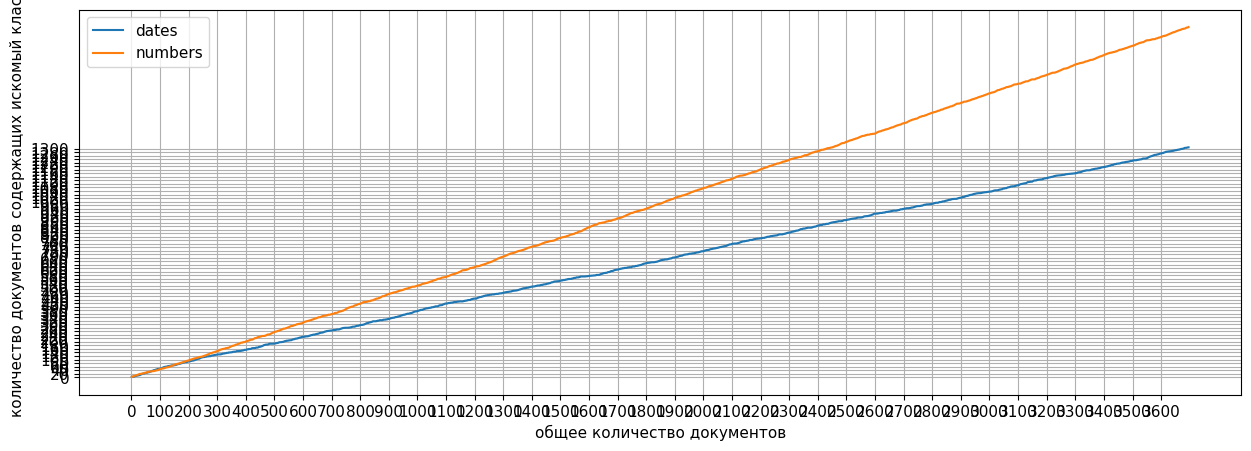

In [8]:
plot_count_dates_numbers(count_list, date_list, number_list)

Далее было размеченно 500 документов на классы рукописные и машинописные даты и номера с помощью labels_images. Размеченные данные сохранены в папках '/data/docs/vh/yolo/train_handwrite/' и '/data/docs/vh/yolo/test_handwrite' по 400 и 100 документов соответственно для сервера МЭР и  папки '/data/users/alex_k/yolov_markup/markup_handwrites/train'  и /data/users/alex_k/yolov_markup/markup_handwrites/test' для сервера DD. 
В виду несложности разметки документов на бинарный класс, выборки по 50 документов не создавались.

In [14]:
# model_handwrite =  YOLO('/data/docs/vh/yolo/models/model_yolo_handwrite.pt') # МЭР
model_handwrite = YOLO('/local_data/models/model_yolo_handwrite.pt') # DD

In [21]:
model_handwrite.train(data='./data/conf_handwrite_typewritten.yaml', epochs=1, imgsz=640, 
                      project='./runs/detect', name='handwrite')

Ultralytics YOLOv8.0.58 🚀 Python-3.10.9 torch-2.0.0+cpu CPU
yolo/engine/trainer: task=detect, mode=train, model=/data/docs/vh/yolo/models/model_yolo_handwrite.pt, data=./data/conf_handwrite_typewritten.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, i

## Markup text for predict summarization

#### DigDes

Модель суммаризации текста уже существует и обучена. Для дальнейшей тренировки необходимо предсказать с помощью модели model_8_classes все классы и оставить только текстовую сущность. Чтобы встроенная в пайплайн модель суммаризации не переработала найденный текст в реферат, необходимо на время предсказания закоментить метод get_summary в функции get_yolo_autocomplete, тогда будут получены только тексты документов без суммаризации. Далее каждому тексту сопоставляется истинный текст суммаризации из df_meta. Таким образом получаем датафрейм с исходным тектом и целевой фичёй суммаризации. Далее дообучаем модель суммаризации.

In [9]:
from utils.autocomplete import yolo_utils as yolo
from utils.autocomplete import markup_yolo as markup
from utils.autocomplete import references_utils as ref
from utils.extraction.prioritet_extractor import PrioritetExtractor

import json
import pandas as pd

from transformers import pipeline
from transformers import AutoTokenizer
from transformers import DataCollatorForSeq2Seq
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer

from datasets import load_dataset
import evaluate

In [10]:
# PATH_TO_DETECT_PDF = Path('/data/docs/vh/incoming_2023_feb/') # МЭР
# PATH_TO_DETECT_PDF = Path('/data/docs/vh/latest_docs/') # МЭР
PATH_TO_DETECT_PDF = '/data/docs/mer/vh_full/'

with open('./data/comparison.json', 'r') as f:
    comparison = json.load(f)
    
CLASSES = ['predict_application', 'predict_content', 'predict_date', 'predict_number', 'predict_recipient', 
           'predict_sender', 'predict_signer', 'predict_text']

model_predict_classes = YOLO('/local_data/models/model_yolo_8_classes.pt')
model_handwrite = YOLO('/local_data/models/model_yolo_handwrite.pt')
partners = pd.read_csv('/local_data/assets/partners.csv')
partners_employees = pd.read_csv('/local_data/assets/partners_employees.csv')

# model_predict_classes = YOLO('/data/docs/vh/yolo/models/model_5_classes.pt') # МЭР
# model_handwrite = YOLO('/data/docs/vh/yolo/models/model_yolo_handwrite.pt') # МЭР
# partners = pd.read_csv('/data/assets/partners.csv', encoding='windows-1251') # МЭР
# partners_employees = pd.read_csv('/data/assets/partners_employees.csv', encoding='windows-1251') # МЭР

partners = ref.update_partners(partners)
partners_employees = ref.update_partners_empoyees(partners_employees)

In [11]:
summarizer = pipeline("summarization", 
                      tokenizer=AutoTokenizer.from_pretrained('/local_data/summarization/data/csebuetnlp_mT5_m2o_russian_crossSum'), 
                      model=AutoModelForSeq2SeqLM.from_pretrained('/local_data/summarization/models/csebuetnlp_mT5_m2o_russian_crossSum/'), 
                      max_length=64)

extractor = PrioritetExtractor()

In [12]:
all_paths = []
c = 0
for path in Path(path_to_pdf).iterdir():
    all_paths.append(get_true_path_to_pdf(path))
    c += 1
    print(c, end='\r')
all_paths = list(filter(None, all_paths))

Error occurred while loading file /data/docs/mer/vh_full/1bc6d4bb-8840-4bbc-80d6-760d4a2c28e8/resolution.json. [Errno 2] No such file or directory: '/data/docs/mer/vh_full/1bc6d4bb-8840-4bbc-80d6-760d4a2c28e8/resolution.json'


In [13]:
paths = all_paths
paths = all_paths[:1000]
len(paths)

1000

In [14]:
import time

In [15]:
# %%time

# pred = {}
# c = 0
# for path in paths:
#     start = time.time()
#     try:
#         pred.update(yolo.get_yolo_autocomplete(path, model_predict_classes, model_handwrite, comparison, 
#                                           partners, partners_employees, CLASSES, summarizer))
#         c += 1
#         print(f'in process: {c}/{len(paths)} s/It: {(time.time() - start):.2f} sec', end='\r')
#     except Exception as ex:
#         print(path)
#         print(ex)

In [41]:
# predicts = pd.DataFrame.from_dict(pred, orient='index').reset_index()
# predicts.rename(columns={'index':'doc_id'}, inplace=True)
# predicts = predicts[['doc_id', 'predict_text']]

In [16]:
predicts = pd.read_pickle('/local_data/data/df_yolo_8_classes.pickle')

In [17]:
df_meta = yolo.get_meta(PATH_TO_DETECT_PDF)

100%|██████████| 9528/9528 [00:11<00:00, 821.99it/s] 


In [18]:
df_meta = df_meta.merge(predicts, on='doc_id')
df_content = df_meta[['doc_id', 'predict_text', 'content']]
df_content.dropna(inplace=True)

/tmp/ipykernel_1515/3630765230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content.dropna(inplace=True)


In [44]:
df_content.iloc[:800].to_csv('/local_data/summarization/data/train_set.csv')
df_content.iloc[800:].to_csv('/local_data/summarization/data/test_set.csv')

In [19]:
dataset = load_dataset('csv', data_files={'train': '/local_data/summarization/data/train_set.csv',
                                          'test': '/local_data/summarization/data/test_set.csv'})
dataset = dataset.remove_columns("Unnamed: 0")

Extracting data files: 100%|██████████| 2/2 [00:00<00:00, 84.42it/s]
Generating train split: 800 examples [00:00, 28457.18 examples/s]
Generating test split: 173 examples [00:00, 21057.33 examples/s]


In [20]:
model_name = "csebuetnlp/mT5_m2o_russian_crossSum"
model = AutoModelForSeq2SeqLM.from_pretrained( '/local_data/summarization/models/csebuetnlp_mT5_m2o_russian_crossSum/')
tokenizer = AutoTokenizer.from_pretrained('/local_data/summarization/data/csebuetnlp_mT5_m2o_russian_crossSum')

In [21]:
def preprocess_function(examples):
    inputs = [prefix + doc for doc in examples["predict_text"]]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    labels = tokenizer(text_target=examples["content"], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [22]:
prefix = "summarize: "
tokenized_dataset = dataset.map(preprocess_function, batched=True)
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)
rouge = evaluate.load("rouge")

Map: 100%|██████████| 173/173 [00:00<00:00, 7370.24 examples/s]


In [23]:
training_args = Seq2SeqTrainingArguments(
    output_dir="./",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=1,
    predict_with_generate=True,
    fp16=False,
    push_to_hub=False)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# аргумент  в training_args fp16=True - проблемы - работает только с куда
# возможное решение !pip install transformers==4.28.0
# или pip install accelerate -U

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.20.1`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [24]:
!pip install transformers==4.28.0

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 16.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.31.0
    Uninstalling transformers-4.31.0:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/opt/venv/bin/transformers-cli'
Check the permissions.



In [ ]:
trainer.train()

In [ ]:
# SAVE MODEL AND TOKENIZER

# tokenizer.save_pretrained('/local_data/summarization/data/csebuetnlp_mT5_m2o_russian_crossSum')
# model.save_pretrained('/local_data/summarization/models/csebuetnlp_mT5_m2o_russian_crossSum/')